In [30]:
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [31]:
# 定义目标目录
target_dir = 'history'

# 定义文件名的通配符模式
his_files = sorted(glob.glob(os.path.join('history', "History_Personal_Solution*")), 
                   key=lambda x: int(''.join(filter(str.isdigit, x))))

In [32]:
id = 0
df = pd.DataFrame()  # 创建空的DataFrame

for file_item in his_files:
    data = []
    with open(file_item, 'r') as f:
        for readline in f:
            data.append(np.fromstring(readline.strip()[1:-1], dtype=float, sep=' '))

        # 创建临时DataFrame，并为每列指定列名
        temp_df = pd.DataFrame(data, columns=['D', 'aa', 'cc', 'mm'])
        # 添加ID列
        temp_df['ID'] = id
        temp_df['Interation'] = range(100)
        # 将临时DataFrame添加到主DataFrame中
        df = pd.concat([df, temp_df], ignore_index=True)

    id += 1


C:\Users\long\AppData\Local\Temp\ipykernel_15680\66590629.py:8: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  data.append(np.fromstring(readline.strip()[1:-1], dtype=float, sep=' '))


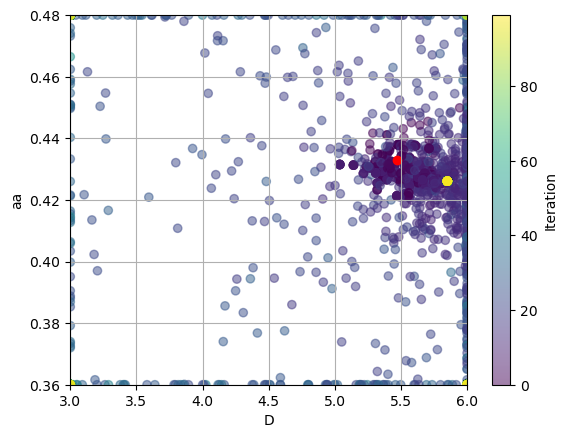

In [33]:
xL = [3, 0.36, 0.72, 3]
xU = [6, 0.48, 0.92, 6]

# 从第二行开始，每隔100行取一个样本
plot_df = df.iloc[0::1]
# 绘制散点图，颜色根据ID信息自动调整
plt.scatter(plot_df["D"], plot_df["aa"], c=plot_df["Interation"], cmap='viridis', alpha=0.5)

# 限制x坐标范围
plt.xlim(xL[0], xU[0])
# 限制y坐标范围
plt.ylim(xL[1], xU[1])
plt.xlabel(plot_df.columns[0])
plt.ylabel(plot_df.columns[1])
# 添加网格线
plt.grid(True)
# 显示图例
plt.colorbar(label='Iteration')

# 添加红色的散点
plt.scatter([5.4683], [0.4331], color='red')

plt.show()

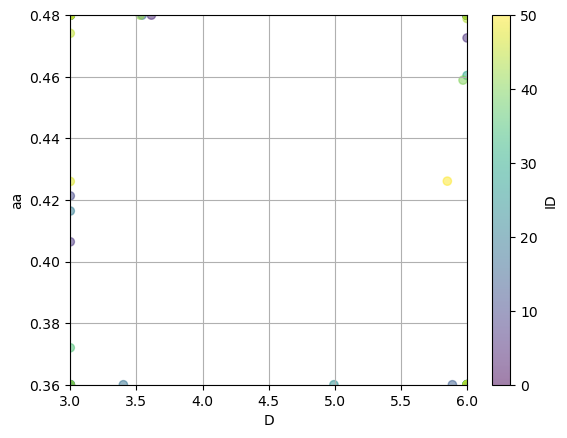

In [34]:
xL = [3, 0.36, 0.72, 3]
xU = [6, 0.48, 0.92, 6]

# 从第二行开始，每隔100行取一个样本
plot_df = df.iloc[33::100]

# 获取散点的ID列表
ids = plot_df.index.tolist()

# 为每个散点设置不同的颜色，根据其ID信息
colors = np.arange(len(plot_df))

# 绘制散点图，颜色根据ID信息自动调整
plt.scatter(plot_df["D"], plot_df["aa"], c=colors, cmap='viridis', alpha=0.5)

# 限制x坐标范围
plt.xlim(xL[0], xU[0])
# 限制y坐标范围
plt.ylim(xL[1], xU[1])
plt.xlabel(plot_df.columns[0])
plt.ylabel(plot_df.columns[1])
# 添加网格线
plt.grid(True)
# 显示图例
plt.colorbar(label='ID')

plt.show()

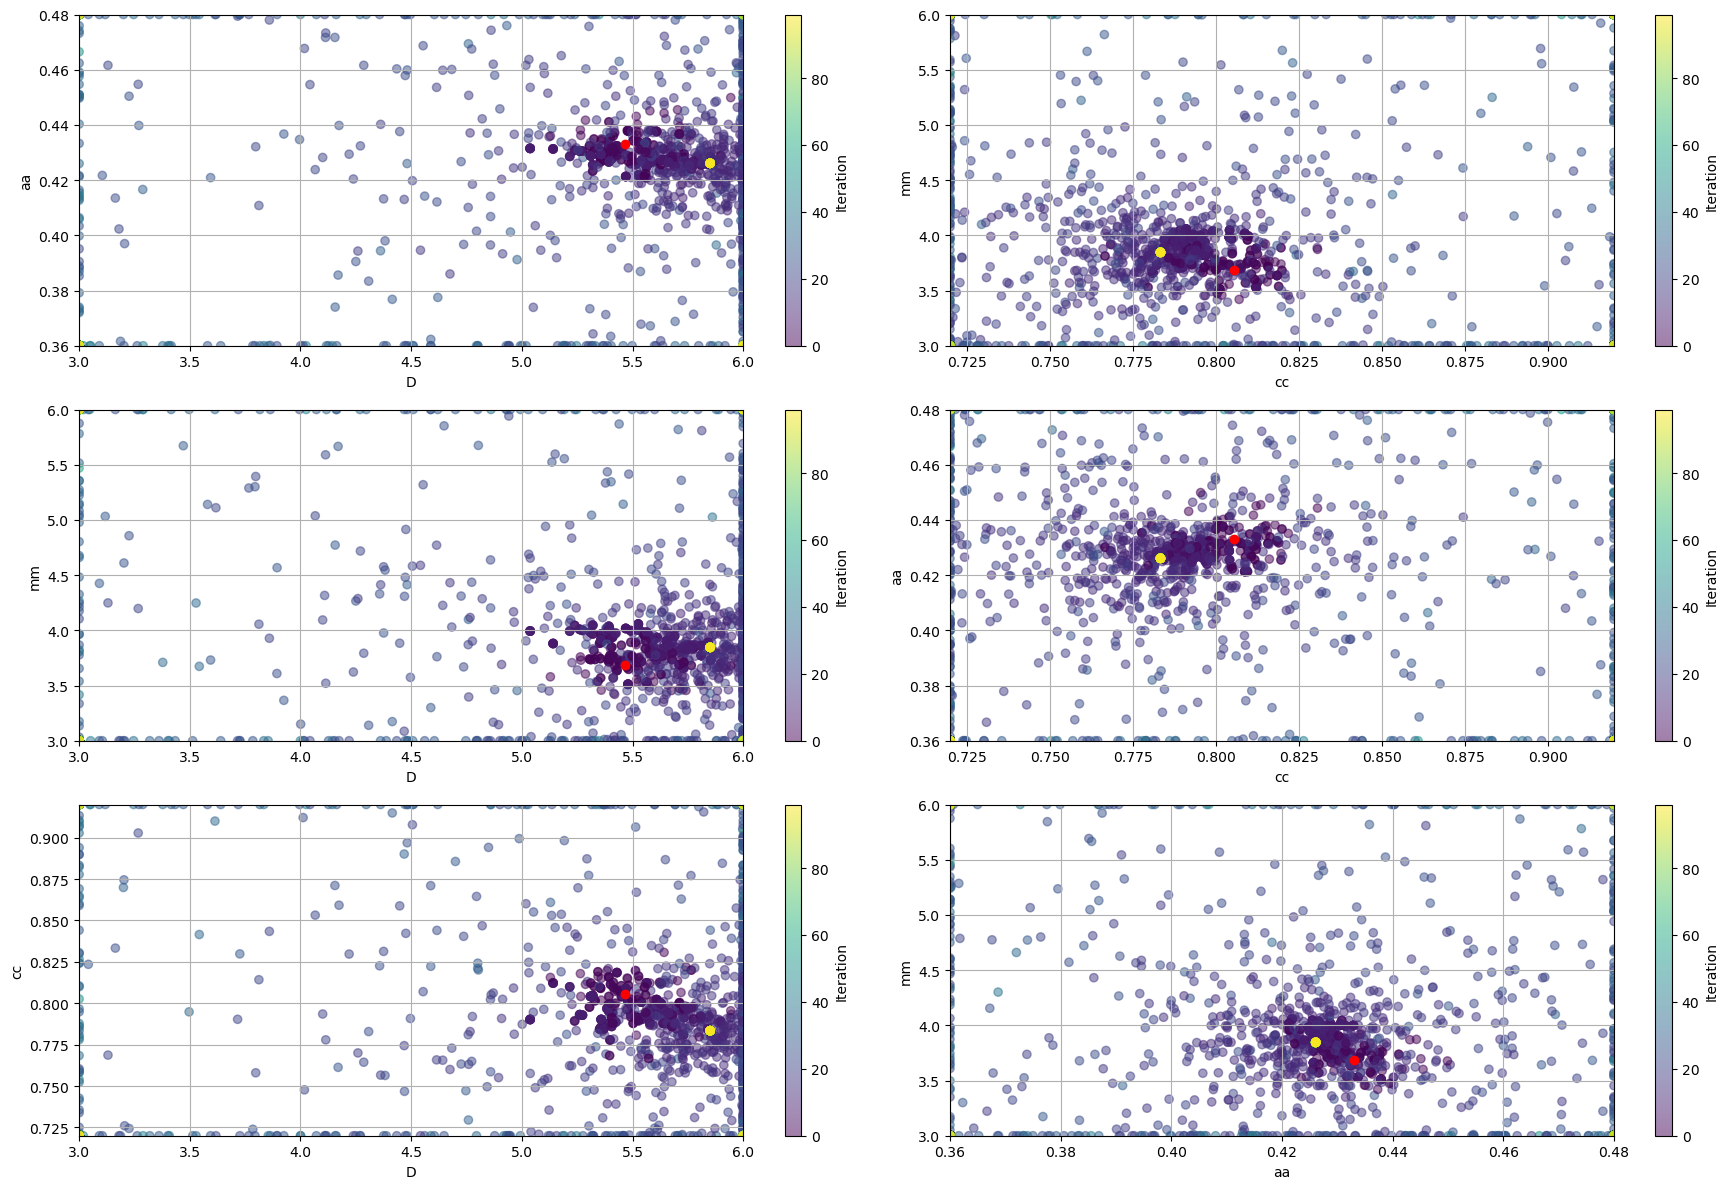

In [35]:
xL = [3, 0.36, 0.72, 3]
xU = [6, 0.48, 0.92, 6]
# [D, aa, cc, mm]
org_x = [5.4683, 0.4331, 0.8055, 3.6837]

best_x = [5.9995, 0.4122, 0.7719, 4.4621]

# 从第二行开始，每隔100行取一个样本
plot_df = df.iloc[0::1]

# 创建一个图形对象，并添加第一个子图
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(18, 12))

# 绘制第一个子图，散点图
sc1 = ax1.scatter(plot_df["D"], plot_df["aa"], c=plot_df["Interation"], cmap='viridis', alpha=0.5)
ax1.set_xlim(xL[0], xU[0])
ax1.set_ylim(xL[1], xU[1])
ax1.set_xlabel(plot_df.columns[0])
ax1.set_ylabel(plot_df.columns[1])
ax1.grid(True)
plt.colorbar(sc1, ax=ax1, label='Iteration')

# 添加红色的散点到第一个子图中
ax1.scatter(org_x[0], org_x[1], color='red')

# 绘制第二个子图，散点图
sc2 = ax2.scatter(plot_df["cc"], plot_df["mm"], c=plot_df["Interation"], cmap='viridis', alpha=0.5)
ax2.set_xlim(xL[2], xU[2])
ax2.set_ylim(xL[3], xU[3])
ax2.set_xlabel(plot_df.columns[2])
ax2.set_ylabel(plot_df.columns[3])
ax2.grid(True)
plt.colorbar(sc2, ax=ax2, label='Iteration')

# 添加红色的散点到第一个子图中
ax2.scatter(org_x[2], org_x[3], color='red')

# 绘制第3个子图，散点图
sc3 = ax3.scatter(plot_df["D"], plot_df["mm"], c=plot_df["Interation"], cmap='viridis', alpha=0.5)
ax3.set_xlim(xL[0], xU[0])
ax3.set_ylim(xL[3], xU[3])
ax3.set_xlabel(plot_df.columns[0])
ax3.set_ylabel(plot_df.columns[3])
ax3.grid(True)
plt.colorbar(sc3, ax=ax3, label='Iteration')
# 添加红色的散点到第一个子图中
ax3.scatter(org_x[0], org_x[3], color='red')

# 绘制第4个子图，散点图
sc4 = ax4.scatter(plot_df["cc"], plot_df["aa"], c=plot_df["Interation"], cmap='viridis', alpha=0.5)
ax4.set_xlim(xL[2], xU[2])
ax4.set_ylim(xL[1], xU[1])
ax4.set_xlabel(plot_df.columns[2])
ax4.set_ylabel(plot_df.columns[1])
ax4.grid(True)
plt.colorbar(sc4, ax=ax4, label='Iteration')
# 添加红色的散点到第一个子图中
ax4.scatter(org_x[2], org_x[1], color='red')

# 绘制第5个子图，散点图
sc5 = ax5.scatter(plot_df["D"], plot_df["cc"], c=plot_df["Interation"], cmap='viridis', alpha=0.5)
ax5.set_xlim(xL[0], xU[0])
ax5.set_ylim(xL[2], xU[2])
ax5.set_xlabel(plot_df.columns[0])
ax5.set_ylabel(plot_df.columns[2])
ax5.grid(True)
plt.colorbar(sc5, ax=ax5, label='Iteration')
# 添加红色的散点到第一个子图中
ax5.scatter(org_x[0], org_x[2], color='red')

# 绘制第6个子图，散点图
sc6 = ax6.scatter(plot_df["aa"], plot_df["mm"], c=plot_df["Interation"], cmap='viridis', alpha=0.5)
ax6.set_xlim(xL[1], xU[1])
ax6.set_ylim(xL[3], xU[3])
ax6.set_xlabel(plot_df.columns[1])
ax6.set_ylabel(plot_df.columns[3])
ax6.grid(True)
plt.colorbar(sc6, ax=ax6, label='Iteration')

# 添加红色的散点到第一个子图中
ax6.scatter(org_x[1], org_x[3], color='red')

plt.tight_layout()
plt.show()


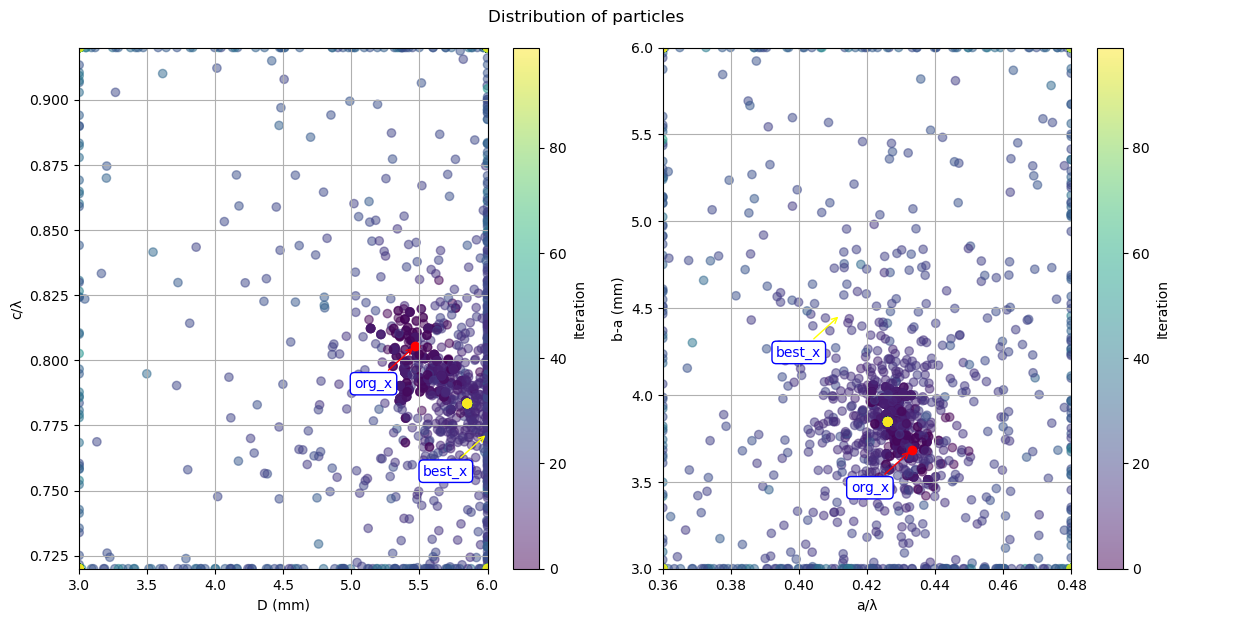

In [36]:
xL = [3, 0.36, 0.72, 3]
xU = [6, 0.48, 0.92, 6]
# [D, aa, cc, mm]
org_x = [5.4683, 0.4331, 0.8055, 3.6837]

best_x = [5.9995, 0.4122, 0.7719, 4.4621]

# 从第二行开始，每隔100行取一个样本
plot_df = df.iloc[0::1]

# 创建一个图形对象，并添加第一个子图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# 绘制第一个子图，散点图
sc1 = ax1.scatter(plot_df["D"], plot_df["cc"], c=plot_df["Interation"], cmap='viridis', alpha=0.5)
ax1.set_xlim(xL[0], xU[0])
ax1.set_ylim(xL[2], xU[2])
ax1.set_xlabel('D (mm)')
ax1.set_ylabel('c/λ')
ax1.grid(True)
plt.colorbar(sc1, ax=ax1, label='Iteration')

# 添加红色的散点到第一个子图中
ax1.scatter(org_x[0], org_x[2], color='red')

# 绘制第6个子图，散点图
sc6 = ax2.scatter(plot_df["aa"], plot_df["mm"], c=plot_df["Interation"], cmap='viridis', alpha=0.5)
ax2.set_xlim(xL[1], xU[1])
ax2.set_ylim(xL[3], xU[3])
ax2.set_xlabel('a/λ')
ax2.set_ylabel('b-a (mm)')
ax2.grid(True)
plt.colorbar(sc6, ax=ax2, label='Iteration')

# 添加红色的散点到第一个子图中
ax2.scatter(org_x[1], org_x[3], color='red')

# 在 ax1 中标注 org_x，并添加箭头
ax1.annotate('org_x', (org_x[0], org_x[2]), textcoords="offset points", xytext=(-30,-30), ha='center', fontsize=10, color='blue', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="blue", lw=1), arrowprops=dict(arrowstyle="->", color='red'))

# 在 ax1 中标注 best_x，并添加箭头
ax1.annotate('best_x', (best_x[0], best_x[2]), textcoords="offset points", xytext=(-30,-30), ha='center', fontsize=10, color='blue', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="blue", lw=1), arrowprops=dict(arrowstyle="->", color='yellow'))

# 在 ax2 中标注 org_x，并添加箭头
ax2.annotate('org_x', (org_x[1], org_x[3]), textcoords="offset points", xytext=(-30,-30), ha='center', fontsize=10, color='blue', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="blue", lw=1), arrowprops=dict(arrowstyle="->", color='red'))

# 在 ax2 中标注 best_x，并添加箭头
ax2.annotate('best_x', (best_x[1], best_x[3]), textcoords="offset points", xytext=(-30,-30), ha='center', fontsize=10, color='blue', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="blue", lw=1), arrowprops=dict(arrowstyle="->", color='yellow'))


plt.tight_layout()
plt.title('Distribution of particles                                                                                                           \n', loc='center')
plt.show()


In [37]:
plot_df.head()

D      aa      cc      mm  ID  Interation
0  5.5031  0.4263  0.8005  3.7030   0           0
1  5.3517  0.4286  0.7844  3.8832   0           1
2  5.3517  0.4286  0.7844  3.8832   0           2
3  5.3517  0.4286  0.7844  3.8832   0           3
4  5.3517  0.4286  0.7844  3.8832   0           4

In [38]:
# 定义文件名的通配符模式
his_fitfiles = sorted(glob.glob(os.path.join('history', "History_Personal_Fitness*")), 
                   key=lambda x: int(''.join(filter(str.isdigit, x))))

In [39]:
import re

df_fit = pd.DataFrame()  # 创建空的DataFrame

def extract_one(data_text):
    data = float(data_text)
    return data

for file_item in his_fitfiles:

    # 使用正则表达式提取整数部分
    integer_part = re.search(r'\d+', file_item).group()

    # 将提取到的字符串转换为整数
    integer_value = int(integer_part)

    data = []
    with open(file_item, 'r') as f:
        for readline in f:
            float_vector = extract_one(readline)
            data.append(float_vector)

        # 创建临时DataFrame，并为每列指定列名
        temp_df = pd.DataFrame(data, columns=['Fitness'])
        # 将临时DataFrame添加到主DataFrame中
        df_fit = pd.concat([df_fit, temp_df], ignore_index=True)

In [40]:
df_all = pd.concat([df, df_fit], axis=1)

In [41]:
# 定义文件名的通配符模式
his_frefiles = sorted(glob.glob(os.path.join('history', "History_Personal_Freq*")), 
                   key=lambda x: int(''.join(filter(str.isdigit, x))))

In [42]:
import re

df_fre = pd.DataFrame()  # 创建空的DataFrame

def extract_one(data_text):
    data = float(data_text)
    return data

for file_item in his_frefiles:

    # 使用正则表达式提取整数部分
    integer_part = re.search(r'\d+', file_item).group()

    # 将提取到的字符串转换为整数
    integer_value = int(integer_part)

    data = []
    with open(file_item, 'r') as f:
        for readline in f:
            float_vector = extract_one(readline)
            data.append(float_vector)

        # 创建临时DataFrame，并为每列指定列名
        temp_df = pd.DataFrame(data, columns=['Freq'])
        # 将临时DataFrame添加到主DataFrame中
        df_fre = pd.concat([df_fre, temp_df], ignore_index=True)

In [43]:
df_all = pd.concat([df_all, df_fre], axis=1)

In [44]:
df_all.head()

D      aa      cc      mm  ID  Interation Fitness      Freq
0  5.5031  0.4263  0.8005  3.7030   0           0     NaN  5.750405
1  5.3517  0.4286  0.7844  3.8832   0           1     NaN  5.738601
2  5.3517  0.4286  0.7844  3.8832   0           2     NaN  5.738601
3  5.3517  0.4286  0.7844  3.8832   0           3     NaN  5.738601
4  5.3517  0.4286  0.7844  3.8832   0           4     NaN  5.738601

In [45]:
# 定义文件名的通配符模式
his_shuntImpfiles = sorted(glob.glob(os.path.join('history', "History_Personal_ShuntImp*")), 
                   key=lambda x: int(''.join(filter(str.isdigit, x))))

import re

df_shunt = pd.DataFrame()  # 创建空的DataFrame

def extract_one(data_text):
    data = float(data_text)
    return data

for file_item in his_shuntImpfiles:

    # 使用正则表达式提取整数部分
    integer_part = re.search(r'\d+', file_item).group()

    # 将提取到的字符串转换为整数
    integer_value = int(integer_part)

    data = []
    with open(file_item, 'r') as f:
        for readline in f:
            float_vector = extract_one(readline)
            data.append(float_vector)

        # 创建临时DataFrame，并为每列指定列名
        temp_df = pd.DataFrame(data, columns=['ShuntImp'])
        # 将临时DataFrame添加到主DataFrame中
        df_shunt = pd.concat([df_shunt, temp_df], ignore_index=True)

df_all = pd.concat([df_all, df_shunt], axis=1)

In [46]:
df_all.head()

D      aa      cc      mm  ID  Interation Fitness      Freq  \
0  5.5031  0.4263  0.8005  3.7030   0           0     NaN  5.750405   
1  5.3517  0.4286  0.7844  3.8832   0           1     NaN  5.738601   
2  5.3517  0.4286  0.7844  3.8832   0           2     NaN  5.738601   
3  5.3517  0.4286  0.7844  3.8832   0           3     NaN  5.738601   
4  5.3517  0.4286  0.7844  3.8832   0           4     NaN  5.738601   

     ShuntImp  
0  18049534.0  
1  18116251.0  
2  18116251.0  
3  18116251.0  
4  18116251.0

In [47]:
# 定义文件名的通配符模式
his_rOverQfiles = sorted(glob.glob(os.path.join('history', "History_Personal_rOverQ*")), 
                   key=lambda x: int(''.join(filter(str.isdigit, x))))

import re

df_rOverQ = pd.DataFrame()  # 创建空的DataFrame

def extract_one(data_text):
    data = float(data_text)
    return data

for file_item in his_rOverQfiles:

    # 使用正则表达式提取整数部分
    integer_part = re.search(r'\d+', file_item).group()

    # 将提取到的字符串转换为整数
    integer_value = int(integer_part)

    data = []
    with open(file_item, 'r') as f:
        for readline in f:
            float_vector = extract_one(readline)
            data.append(float_vector)

        # 创建临时DataFrame，并为每列指定列名
        temp_df = pd.DataFrame(data, columns=['rOverQ'])
        # 将临时DataFrame添加到主DataFrame中
        df_rOverQ = pd.concat([df_rOverQ, temp_df], ignore_index=True)

df_all = pd.concat([df_all, df_rOverQ], axis=1)

In [48]:
df_all.head()

D      aa      cc      mm  ID  Interation Fitness      Freq  \
0  5.5031  0.4263  0.8005  3.7030   0           0     NaN  5.750405   
1  5.3517  0.4286  0.7844  3.8832   0           1     NaN  5.738601   
2  5.3517  0.4286  0.7844  3.8832   0           2     NaN  5.738601   
3  5.3517  0.4286  0.7844  3.8832   0           3     NaN  5.738601   
4  5.3517  0.4286  0.7844  3.8832   0           4     NaN  5.738601   

     ShuntImp     rOverQ  
0  18049534.0  108.47124  
1  18116251.0  107.42654  
2  18116251.0  107.42654  
3  18116251.0  107.42654  
4  18116251.0  107.42654

In [49]:
df_all.shape

(5100, 10)

In [50]:
df_all["Q"] = df_all["ShuntImp"] / df_all["rOverQ"]

In [51]:
df_all.head()

D      aa      cc      mm  ID  Interation Fitness      Freq  \
0  5.5031  0.4263  0.8005  3.7030   0           0     NaN  5.750405   
1  5.3517  0.4286  0.7844  3.8832   0           1     NaN  5.738601   
2  5.3517  0.4286  0.7844  3.8832   0           2     NaN  5.738601   
3  5.3517  0.4286  0.7844  3.8832   0           3     NaN  5.738601   
4  5.3517  0.4286  0.7844  3.8832   0           4     NaN  5.738601   

     ShuntImp     rOverQ              Q  
0  18049534.0  108.47124  166399.259380  
1  18116251.0  107.42654  168638.504042  
2  18116251.0  107.42654  168638.504042  
3  18116251.0  107.42654  168638.504042  
4  18116251.0  107.42654  168638.504042

In [52]:
df_parto = df_all[(df_all['rOverQ'] >= 20)]

In [53]:
df_parto.head()

D      aa      cc      mm  ID  Interation Fitness      Freq  \
0  5.5031  0.4263  0.8005  3.7030   0           0     NaN  5.750405   
1  5.3517  0.4286  0.7844  3.8832   0           1     NaN  5.738601   
2  5.3517  0.4286  0.7844  3.8832   0           2     NaN  5.738601   
3  5.3517  0.4286  0.7844  3.8832   0           3     NaN  5.738601   
4  5.3517  0.4286  0.7844  3.8832   0           4     NaN  5.738601   

     ShuntImp     rOverQ              Q  
0  18049534.0  108.47124  166399.259380  
1  18116251.0  107.42654  168638.504042  
2  18116251.0  107.42654  168638.504042  
3  18116251.0  107.42654  168638.504042  
4  18116251.0  107.42654  168638.504042

In [59]:
import pandas as pd
import numpy as np

# ========== 1. 读取或准备 DataFrame ==========

# 假设你的 DataFrame 名为 df，已经包含以下列：
# ['ShuntImp', 'Q', 'Freq']
# 示例：df = pd.read_csv("your_data.csv")

# 创建 freq_error 列（目标值之一，越接近 5.71 越好）
df_parto["freq_error"] = np.abs(df_parto["Freq"] - 5.71)

# 构建目标矩阵：注意最大化的目标需取负
objectives = np.vstack([
    -df_parto["ShuntImp"].values,   # 最大化 → 取负
    -df_parto["Q"].values,          # 最大化 → 取负
     df_parto["freq_error"].values  # 最小化
]).T

# ========== 2. 非支配排序 ==========

def non_dominated_sort(objs):
    n = len(objs)
    domination_count = np.zeros(n, dtype=int)
    dominated_solutions = [[] for _ in range(n)]
    ranks = np.zeros(n, dtype=int)
    fronts = [[]]

    for p in range(n):
        for q in range(n):
            if p == q:
                continue
            if all(objs[p] <= objs[q]) and any(objs[p] < objs[q]):
                dominated_solutions[p].append(q)
            elif all(objs[q] <= objs[p]) and any(objs[q] < objs[p]):
                domination_count[p] += 1
        if domination_count[p] == 0:
            ranks[p] = 0
            fronts[0].append(p)

    i = 0
    while fronts[i]:
        next_front = []
        for p in fronts[i]:
            for q in dominated_solutions[p]:
                domination_count[q] -= 1
                if domination_count[q] == 0:
                    ranks[q] = i + 1
                    next_front.append(q)
        i += 1
        fronts.append(next_front)
    return ranks

# ========== 3. 拥挤度距离 ==========

def crowding_distance(objs):
    n, m = objs.shape
    distance = np.zeros(n)
    for i in range(m):  # 遍历每个目标
        sorted_idx = np.argsort(objs[:, i])
        distance[sorted_idx[0]] = distance[sorted_idx[-1]] = np.inf  # 边界解设为∞
        obj_range = objs[sorted_idx[-1], i] - objs[sorted_idx[0], i]
        if obj_range == 0:
            continue
        for j in range(1, n - 1):
            distance[sorted_idx[j]] += (objs[sorted_idx[j + 1], i] - objs[sorted_idx[j - 1], i]) / obj_range
    return distance

# ========== 4. 应用非支配排序 + 拥挤度计算 ==========

# 计算 rank
rank_array = non_dominated_sort(objectives)
df_parto["rank"] = rank_array

# 每一 rank 层分别计算拥挤度
distance_array = np.zeros(len(df_parto))
for r in np.unique(rank_array):
    idx = np.where(rank_array == r)[0]
    sub_objs = objectives[idx]
    d = crowding_distance(sub_objs)
    distance_array[idx] = d

df_parto["distance"] = distance_array

# ========== 5. 查看或导出帕累托前沿解 ==========

pareto_front = df_parto[df_parto["rank"] == 0]
pareto_front_sorted = pareto_front.sort_values(by="distance", ascending=False)


C:\Users\long\AppData\Local\Temp\ipykernel_15680\1697356382.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_parto["freq_error"] = np.abs(df_parto["Freq"] - 5.71)
C:\Users\long\AppData\Local\Temp\ipykernel_15680\1697356382.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_parto["rank"] = rank_array
C:\Users\long\AppData\Local\Temp\ipykernel_15680\1697356382.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [60]:
pareto_front_sorted.head()

D      aa      cc      mm  ID  Interation Fitness      Freq  \
4828  3.7259  0.4800  0.8298  3.0000  48          28     NaN  5.709947   
3718  5.3430  0.4247  0.7818  4.4188  37          18     NaN  5.688717   
3526  6.0000  0.3842  0.7200  4.7216  35          26     NaN  5.956223   
1223  6.0000  0.4108  0.7844  4.2717  12          23     NaN  5.743823   
704   5.3861  0.4287  0.7873  4.0199   7           4     NaN  5.709910   

        ShuntImp      rOverQ              Q  freq_error  rank  distance  
4828  12496591.0   84.777978  147403.739683    0.000053     0       inf  
3718  18474326.0  107.381030  172044.596704    0.021283     0       inf  
3526  19416467.0  116.387560  166825.964906    0.246223     0       inf  
1223  19385707.0  113.578930  170680.486249    0.033823     0  0.986124  
704   18303847.0  107.539930  170205.122879    0.000090     0  0.839493

In [56]:
df_parto.head()

D      aa      cc      mm  ID  Interation Fitness      Freq  \
0  5.5031  0.4263  0.8005  3.7030   0           0     NaN  5.750405   
1  5.3517  0.4286  0.7844  3.8832   0           1     NaN  5.738601   
2  5.3517  0.4286  0.7844  3.8832   0           2     NaN  5.738601   
3  5.3517  0.4286  0.7844  3.8832   0           3     NaN  5.738601   
4  5.3517  0.4286  0.7844  3.8832   0           4     NaN  5.738601   

     ShuntImp     rOverQ              Q  freq_error  rank  distance  
0  18049534.0  108.47124  166399.259380    0.040405    12  0.083300  
1  18116251.0  107.42654  168638.504042    0.028601     6  0.185339  
2  18116251.0  107.42654  168638.504042    0.028601     6  0.000000  
3  18116251.0  107.42654  168638.504042    0.028601     6  0.037082  
4  18116251.0  107.42654  168638.504042    0.028601     6  0.258905

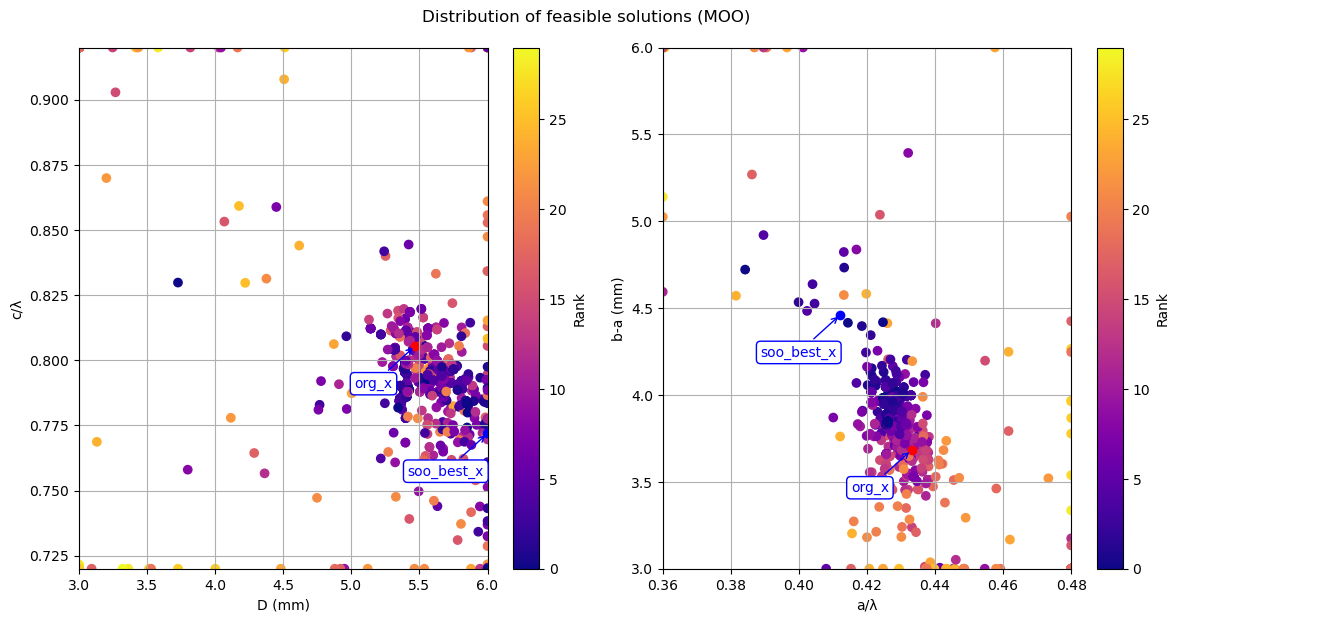

In [72]:
import matplotlib.colors as mcolors
xL = [3, 0.36, 0.72, 3]
xU = [6, 0.48, 0.92, 6]
# [D, aa, cc, mm]
org_x = [5.4683, 0.4331, 0.8055, 3.6837]

best_x = [5.9995, 0.4122, 0.7719, 4.4621]

# 从第二行开始，每隔100行取一个样本
plot_df = df_parto.iloc[0::1]

# 创建一个图形对象，并添加第一个子图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# 绘制第一个子图，散点图
# 获取 iter_num 范围
iter_min = plot_df["Interation"].min()
iter_max = plot_df["Interation"].max()

# 设置一个人为的“转折点”，让 <=5 占80%
threshold = 5
ratio = 0.8  # 80%

# 构建 piecewise linear normalization
def scaled_norm(val):
    """将原始iter_num值缩放到0-1之间，<=5占80%的色条"""
    val = np.asarray(val)
    return np.where(val <= threshold,
                    ratio * (val - iter_min) / (threshold - iter_min),
                    ratio + (1 - ratio) * (val - threshold) / (iter_max - threshold))

# 创建一个自定义的 Normalize 对象（需要实现 .__call__ 和 .inverse）
class CustomNormalize(mcolors.Normalize):
    def __init__(self, threshold, iter_min, iter_max, ratio=0.8):
        super().__init__(vmin=iter_min, vmax=iter_max)
        self.threshold = threshold
        self.ratio = ratio

    def __call__(self, value, clip=None):
        return scaled_norm(value)

norm = CustomNormalize(threshold=threshold, iter_min=iter_min, iter_max=iter_max, ratio=ratio)

# 使用该 norm 显示
sc1 = ax1.scatter(plot_df["D"], plot_df["cc"], c=plot_df["rank"], cmap="plasma", alpha=1)
plt.colorbar(sc1, ax=ax1, label='Rank')

ax1.set_xlim(xL[0], xU[0])
ax1.set_ylim(xL[2], xU[2])
ax1.set_xlabel('D (mm)')
ax1.set_ylabel('c/λ')
ax1.grid(True)

# 添加红色的散点到第一个子图中
ax1.scatter(org_x[0], org_x[2], color='red')
# 添加红色的散点到第一个子图中
ax1.scatter(best_x[0], best_x[2], color='blue')

# 绘制第6个子图，散点图
sc6 = ax2.scatter(plot_df["aa"], plot_df["mm"], c=plot_df["rank"], cmap="plasma",  alpha=1)
plt.colorbar(sc6, ax=ax2, label='Rank')
ax2.set_xlim(xL[1], xU[1])
ax2.set_ylim(xL[3], xU[3])
ax2.set_xlabel('a/λ')
ax2.set_ylabel('b-a (mm)')
ax2.grid(True)

# 添加红色的散点到第一个子图中
ax2.scatter(org_x[1], org_x[3], color='red')

# 添加红色的散点到第一个子图中
ax2.scatter(best_x[1], best_x[3], color='blue',alpha=1.0)

# 在 ax1 中标注 org_x，并添加箭头
ax1.annotate('org_x', (org_x[0], org_x[2]), textcoords="offset points", xytext=(-30,-30), ha='center', fontsize=10, color='blue', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="blue", lw=1), arrowprops=dict(arrowstyle="->", color='blue'))

# 在 ax1 中标注 best_x，并添加箭头
ax1.annotate('soo_best_x', (best_x[0], best_x[2]), textcoords="offset points", xytext=(-30,-30), ha='center', fontsize=10, color='blue', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="blue", lw=1), arrowprops=dict(arrowstyle="->", color='blue'))

# 在 ax2 中标注 org_x，并添加箭头
ax2.annotate('org_x', (org_x[1], org_x[3]), textcoords="offset points", xytext=(-30,-30), ha='center', fontsize=10, color='blue', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="blue", lw=1), arrowprops=dict(arrowstyle="->", color='blue'))

# 在 ax2 中标注 best_x，并添加箭头
ax2.annotate('soo_best_x', (best_x[1], best_x[3]), textcoords="offset points", xytext=(-30,-30), ha='center', fontsize=10, color='blue', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="blue", lw=1), arrowprops=dict(arrowstyle="->", color='blue'))


plt.tight_layout()
plt.title('Distribution of feasible solutions (MOO)                                                                                                           \n', loc='center')
plt.show()


In [73]:
plot_parto_tmp = df_parto[(df_parto['Freq'] >= 5.70) & (df_parto['Freq'] <= 5.72) & (df_parto['rOverQ'] >= 20)]

In [74]:
max_shuntImp = plot_parto_tmp[plot_parto_tmp['ShuntImp'] == plot_parto_tmp['ShuntImp'].max()]

In [75]:
max_shuntImp.head()

D      aa      cc      mm  ID  Interation Fitness      Freq  \
3906  5.8507  0.4261  0.7834  3.8458  39           6     NaN  5.710759   
3907  5.8507  0.4261  0.7834  3.8458  39           7     NaN  5.710759   
3908  5.8507  0.4261  0.7834  3.8458  39           8     NaN  5.710759   
3909  5.8507  0.4261  0.7834  3.8458  39           9     NaN  5.710759   
5010  5.8507  0.4261  0.7834  3.8458  50          10     NaN  5.710759   

        ShuntImp     rOverQ              Q  freq_error  rank  distance  
3906  18840832.0  110.92854  169846.569693    0.000759     0       0.0  
3907  18840832.0  110.92854  169846.569693    0.000759     0       0.0  
3908  18840832.0  110.92854  169846.569693    0.000759     0       0.0  
3909  18840832.0  110.92854  169846.569693    0.000759     0       0.0  
5010  18840832.0  110.92854  169846.569693    0.000759     0       0.0

In [64]:
plot_parto_tmp.head()

D      aa      cc      mm  ID  Interation Fitness      Freq  \
504  5.3929  0.4266  0.7992  4.0363   5           4     NaN  5.710159   
505  5.3929  0.4266  0.7992  4.0363   5           5     NaN  5.710159   
506  5.3929  0.4266  0.7992  4.0363   5           6     NaN  5.710159   
507  5.3929  0.4266  0.7992  4.0363   5           7     NaN  5.710159   
508  5.3929  0.4266  0.7992  4.0363   5           8     NaN  5.710159   

       ShuntImp     rOverQ              Q  freq_error  rank  distance  
504  18377959.0  107.77423  170522.758548    0.000159     0  0.017390  
505  18377959.0  107.77423  170522.758548    0.000159     0  0.000901  
506  18377959.0  107.77423  170522.758548    0.000159     0  0.000000  
507  18377959.0  107.77423  170522.758548    0.000159     0  0.000000  
508  18377959.0  107.77423  170522.758548    0.000159     0  0.013926

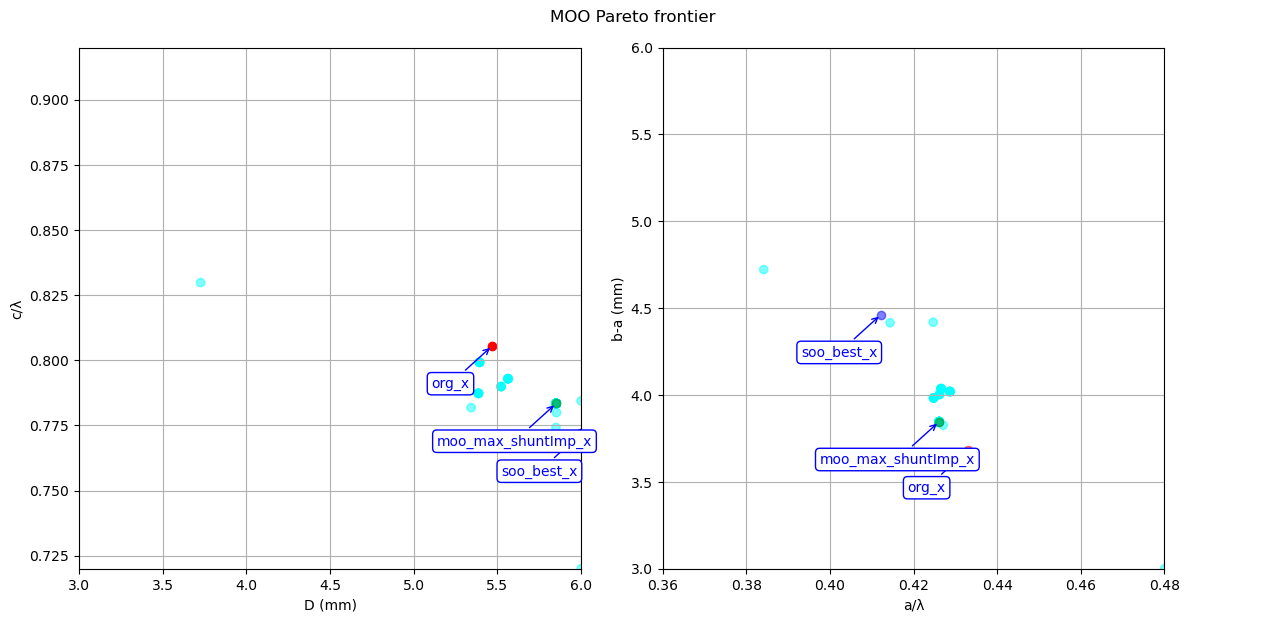

In [76]:
import matplotlib.colors as mcolors
xL = [3, 0.36, 0.72, 3]
xU = [6, 0.48, 0.92, 6]
# [D, aa, cc, mm]
org_x = [5.4683, 0.4331, 0.8055, 3.6837]

best_x = [5.9995, 0.4122, 0.7719, 4.4621]

moo_best_x = [5.8507,	0.4261,	0.7834,	3.8458]

# 从第二行开始，每隔100行取一个样本
plot_df = df_parto[(df_parto['rank'] == 0) & (df_parto['rOverQ'] >= 20)]

# 创建一个图形对象，并添加第一个子图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# 绘制第一个子图，散点图
# 获取 iter_num 范围
iter_min = plot_df["Interation"].min()
iter_max = plot_df["Interation"].max()

# 设置一个人为的“转折点”，让 <=5 占80%
threshold = 5
ratio = 0.8  # 80%

# 构建 piecewise linear normalization
def scaled_norm(val):
    """将原始iter_num值缩放到0-1之间，<=5占80%的色条"""
    val = np.asarray(val)
    return np.where(val <= threshold,
                    ratio * (val - iter_min) / (threshold - iter_min),
                    ratio + (1 - ratio) * (val - threshold) / (iter_max - threshold))

# 创建一个自定义的 Normalize 对象（需要实现 .__call__ 和 .inverse）
class CustomNormalize(mcolors.Normalize):
    def __init__(self, threshold, iter_min, iter_max, ratio=0.8):
        super().__init__(vmin=iter_min, vmax=iter_max)
        self.threshold = threshold
        self.ratio = ratio

    def __call__(self, value, clip=None):
        return scaled_norm(value)

norm = CustomNormalize(threshold=threshold, iter_min=iter_min, iter_max=iter_max, ratio=ratio)

# 使用该 norm 显示
sc1 = ax1.scatter(plot_df["D"], plot_df["cc"], c=plot_df["rank"], cmap="cool", alpha=0.5)
#plt.colorbar(sc1, ax=ax1, label='Rank')

ax1.set_xlim(xL[0], xU[0])
ax1.set_ylim(xL[2], xU[2])
ax1.set_xlabel('D (mm)')
ax1.set_ylabel('c/λ')
ax1.grid(True)

# 添加红色的散点到第一个子图中
ax1.scatter(org_x[0], org_x[2], color='red')
# 添加红色的散点到第一个子图中
ax1.scatter(best_x[0], best_x[2], color='blue')
ax1.scatter(moo_best_x[0], moo_best_x[2], color='green',alpha=0.5)

# 绘制第6个子图，散点图
sc6 = ax2.scatter(plot_df["aa"], plot_df["mm"], c=plot_df["rank"], cmap="cool",  alpha=0.5)
#plt.colorbar(sc6, ax=ax2, label='Rank')
ax2.set_xlim(xL[1], xU[1])
ax2.set_ylim(xL[3], xU[3])
ax2.set_xlabel('a/λ')
ax2.set_ylabel('b-a (mm)')
ax2.grid(True)

# 添加红色的散点到第一个子图中
ax2.scatter(org_x[1], org_x[3], color='red',alpha=0.5)

# 添加红色的散点到第一个子图中
ax2.scatter(best_x[1], best_x[3], color='blue',alpha=0.5)

ax2.scatter(moo_best_x[1], moo_best_x[3], color='green',alpha=0.5)

# 在 ax1 中标注 org_x，并添加箭头
ax1.annotate('org_x', (org_x[0], org_x[2]), textcoords="offset points", xytext=(-30,-30), ha='center', fontsize=10, color='blue', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="blue", lw=1), arrowprops=dict(arrowstyle="->", color='blue'))

# 在 ax1 中标注 best_x，并添加箭头
ax1.annotate('soo_best_x', (best_x[0], best_x[2]), textcoords="offset points", xytext=(-30,-30), ha='center', fontsize=10, color='blue', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="blue", lw=1), arrowprops=dict(arrowstyle="->", color='blue'))

ax1.annotate('moo_max_shuntImp_x', (moo_best_x[0], moo_best_x[2]), textcoords="offset points", xytext=(-30,-30), ha='center', fontsize=10, color='blue', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="blue", lw=1), arrowprops=dict(arrowstyle="->", color='blue'))

# 在 ax2 中标注 org_x，并添加箭头
ax2.annotate('org_x', (org_x[1], org_x[3]), textcoords="offset points", xytext=(-30,-30), ha='center', fontsize=10, color='blue', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="blue", lw=1), arrowprops=dict(arrowstyle="->", color='blue'))

# 在 ax2 中标注 best_x，并添加箭头
ax2.annotate('soo_best_x', (best_x[1], best_x[3]), textcoords="offset points", xytext=(-30,-30), ha='center', fontsize=10, color='blue', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="blue", lw=1), arrowprops=dict(arrowstyle="->", color='blue'))
ax2.annotate('moo_max_shuntImp_x', (moo_best_x[1], moo_best_x[3]), textcoords="offset points", xytext=(-30,-30), ha='center', fontsize=10, color='blue', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="blue", lw=1), arrowprops=dict(arrowstyle="->", color='blue'))

plt.tight_layout()
plt.title('MOO Pareto frontier                                                                                                           \n', loc='center')
plt.show()


In [ ]:
plot_df.shape

(123, 14)

In [ ]:
plot_df.head(14)

D      aa      cc      mm  ID  Interation Fitness      Freq  \
504   5.3929  0.4266  0.7992  4.0363   5           4     NaN  5.710159   
505   5.3929  0.4266  0.7992  4.0363   5           5     NaN  5.710159   
506   5.3929  0.4266  0.7992  4.0363   5           6     NaN  5.710159   
507   5.3929  0.4266  0.7992  4.0363   5           7     NaN  5.710159   
508   5.3929  0.4266  0.7992  4.0363   5           8     NaN  5.710159   
509   5.3929  0.4266  0.7992  4.0363   5           9     NaN  5.710159   
703   5.3861  0.4287  0.7873  4.0199   7           3     NaN  5.709910   
704   5.3861  0.4287  0.7873  4.0199   7           4     NaN  5.709910   
705   5.3861  0.4287  0.7873  4.0199   7           5     NaN  5.709910   
706   5.3861  0.4287  0.7873  4.0199   7           6     NaN  5.709910   
707   5.3861  0.4287  0.7873  4.0199   7           7     NaN  5.709910   
708   5.3861  0.4287  0.7873  4.0199   7           8     NaN  5.709910   
709   5.3861  0.4287  0.7873  4.0199   7           9     NaN  5.709910   
1223  6.0000  0.4108  0.7844  4.2717  12          23     NaN  5.743823   

        ShuntImp     rOverQ              Q  freq_error  rank  distance  
504   18377959.0  107.77423  170522.758548    0.000159     0  0.000901  
505   18377959.0  107.77423  170522.758548    0.000159     0  0.000000  
506   18377959.0  107.77423  170522.758548    0.000159     0  0.000000  
507   18377959.0  107.77423  170522.758548    0.000159     0  0.004863  
508   18377959.0  107.77423  170522.758548    0.000159     0  0.007070  
509   18377959.0  107.77423  170522.758548    0.000159     0  0.000279  
703   18303847.0  107.53993  170205.122879    0.000090     0  0.006203  
704   18303847.0  107.53993  170205.122879    0.000090     0  0.299531  
705   18303847.0  107.53993  170205.122879    0.000090     0  0.000000  
706   18303847.0  107.53993  170205.122879    0.000090     0  0.000000  
707   18303847.0  107.53993  170205.122879    0.000090     0  0.000150  
708   18303847.0  107.53993  170205.122879    0.000090     0  0.000000  
709   18303847.0  107.53993  170205.122879    0.000090     0  0.000000  
1223  19385707.0  113.57893  170680.486249    0.033823     0  0.043990

In [ ]:
max_value = plot_df["ShuntImp"].max()
max_rows = plot_df[plot_df["ShuntImp"] == max_value]

In [ ]:
max_rows

D      aa    cc      mm  ID  Interation Fitness      Freq    ShuntImp  \
3526  6.0  0.3842  0.72  4.7216  35          26     NaN  5.956223  19416467.0   

         rOverQ              Q  freq_error  rank  distance  
3526  116.38756  166825.964906    0.246223     0       inf

In [ ]:
# 筛选条件：Freq 列在 5.7 和 5.72 之间，同时 rOverQ 列大于 20
filtered_df = df_all[(df_all['Freq'] >= 5.7) & (df_all['Freq'] <= 5.72) & (df_all['rOverQ'] > 20)]

In [ ]:
filtered_df2 = df_all[df_all['Freq'] > 0.0]

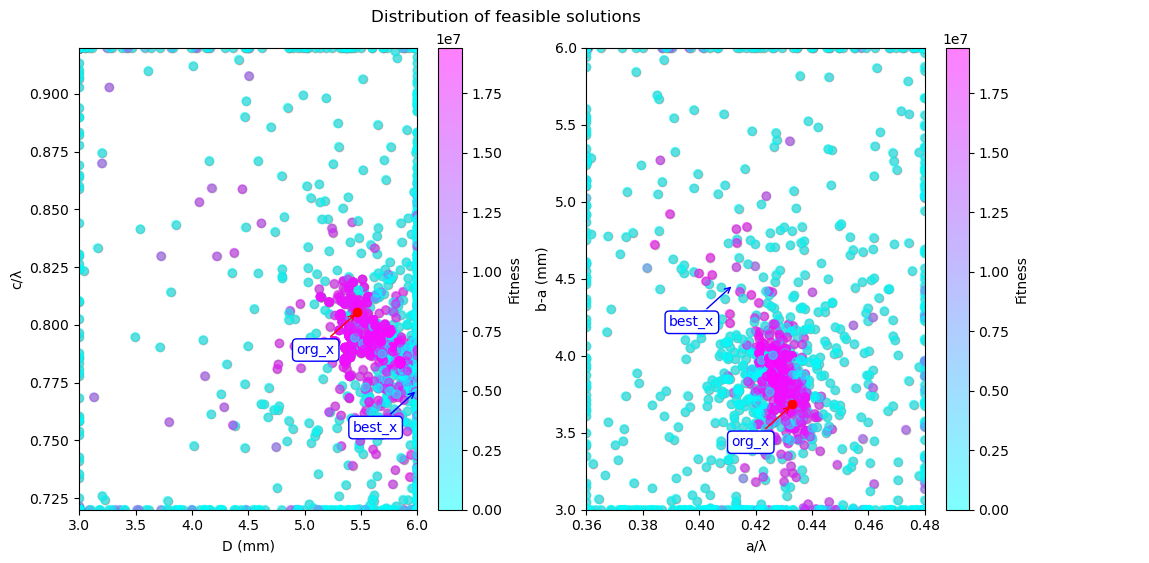

In [ ]:
import matplotlib.pyplot as plt

xL = [3, 0.36, 0.72, 3]
xU = [6, 0.48, 0.92, 6]
# [D, aa, cc, mm]
org_x = [5.4683, 0.4331, 0.8055, 3.6837]

best_x = [5.9995, 0.4122, 0.7719, 4.4621]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# 绘制散点图
# 绘制筛选出来的点，并根据 'ShuntImp' 列的值涂上不同颜色
ax1.scatter(df_all['D'], df_all['cc'],c='gray', alpha=0.5)
sc1 = ax1.scatter(filtered_df2['D'], filtered_df2['cc'], c=filtered_df2['ShuntImp'], cmap='cool', alpha=0.5)




# 绘制筛选出来的点，并根据 'ShuntImp' 列的值涂上不同颜色
ax2.scatter(df_all['aa'], df_all['mm'],c='gray', alpha=0.5)
sc2 = ax2.scatter(filtered_df2['aa'], filtered_df2['mm'], c=filtered_df2['ShuntImp'], cmap='cool', alpha=0.5)


# 添加颜色条
plt.colorbar(sc1, ax=ax1, label='Fitness')



# 添加红色的散点到第一个子图中
ax2.scatter(org_x[1], org_x[3], color='red')

# 添加红色的散点到第一个子图中
ax1.scatter(org_x[0], org_x[2], color='red')

# 添加颜色条
plt.colorbar(sc2, ax=ax2, label='Fitness')


# 在 ax1 中标注 org_x，并添加箭头
ax1.annotate('org_x', (org_x[0], org_x[2]), textcoords="offset points", xytext=(-30,-30), ha='center', fontsize=10, color='blue', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="blue", lw=1), arrowprops=dict(arrowstyle="->", color='red'))

# 在 ax1 中标注 best_x，并添加箭头
ax1.annotate('best_x', (best_x[0], best_x[2]), textcoords="offset points", xytext=(-30,-30), ha='center', fontsize=10, color='blue', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="blue", lw=1), arrowprops=dict(arrowstyle="->", color='blue'))

# 在 ax2 中标注 org_x，并添加箭头
ax2.annotate('org_x', (org_x[1], org_x[3]), textcoords="offset points", xytext=(-30,-30), ha='center', fontsize=10, color='blue', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="blue", lw=1), arrowprops=dict(arrowstyle="->", color='red'))

# 在 ax2 中标注 best_x，并添加箭头
ax2.annotate('best_x', (best_x[1], best_x[3]), textcoords="offset points", xytext=(-30,-30), ha='center', fontsize=10, color='blue', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="blue", lw=1), arrowprops=dict(arrowstyle="->", color='blue'))

ax1.set_xlabel('D (mm)')
ax1.set_ylabel('c/λ')
ax2.set_xlabel('a/λ')
ax2.set_ylabel('b-a (mm)')

ax1.set_xlim(xL[0], xU[0])
ax1.set_ylim(xL[2], xU[2])

ax2.set_xlim(xL[1], xU[1])
ax2.set_ylim(xL[3], xU[3])

# 设置图形标题和坐标轴标签
plt.title('Distribution of feasible solutions                                                                                               \n')

# 显示图形
plt.show()


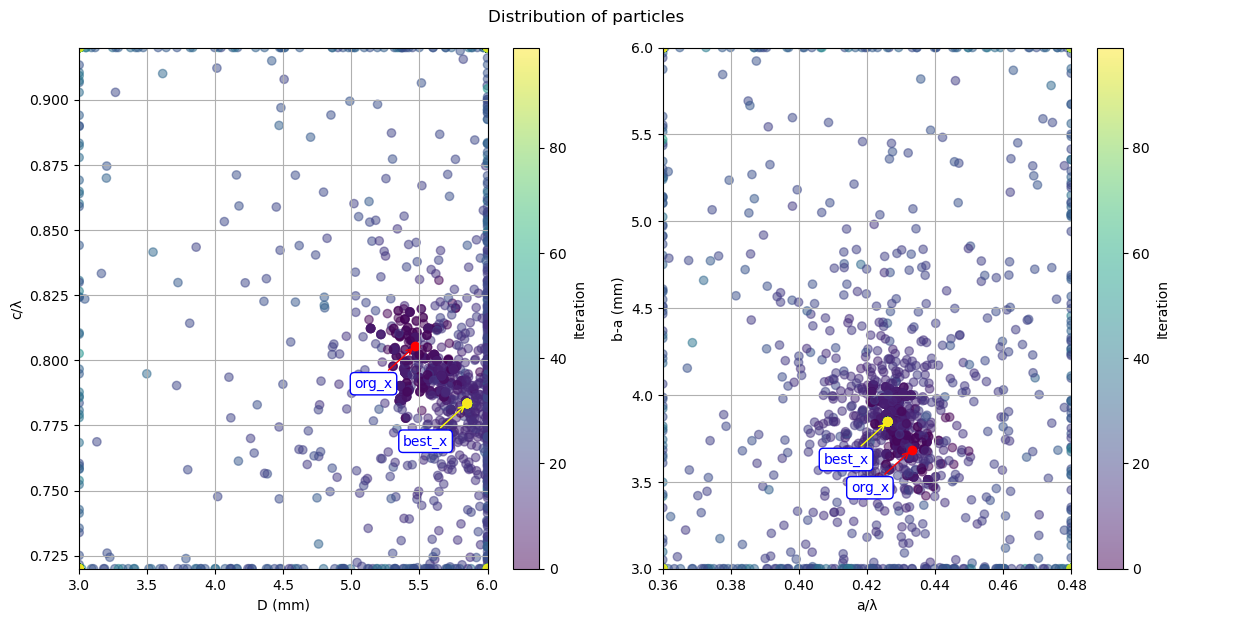

In [ ]:
xL = [3, 0.36, 0.72, 3]
xU = [6, 0.48, 0.92, 6]
# [D, aa, cc, mm]
org_x = [5.4683, 0.4331, 0.8055, 3.6837]

best_x = [5.8507, 0.4261, 0.7834, 3.8458]

# 从第二行开始，每隔100行取一个样本
plot_df = df_all.iloc[0::1]

# 创建一个图形对象，并添加第一个子图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# 绘制第一个子图，散点图
sc1 = ax1.scatter(plot_df["D"], plot_df["cc"], c=plot_df["Interation"], cmap='viridis', alpha=0.5)
ax1.set_xlim(xL[0], xU[0])
ax1.set_ylim(xL[2], xU[2])
ax1.set_xlabel('D (mm)')
ax1.set_ylabel('c/λ')
ax1.grid(True)
plt.colorbar(sc1, ax=ax1, label='Iteration')

# 添加红色的散点到第一个子图中
ax1.scatter(org_x[0], org_x[2], color='red')

# 绘制第6个子图，散点图
sc6 = ax2.scatter(plot_df["aa"], plot_df["mm"], c=plot_df["Interation"], cmap='viridis', alpha=0.5)
ax2.set_xlim(xL[1], xU[1])
ax2.set_ylim(xL[3], xU[3])
ax2.set_xlabel('a/λ')
ax2.set_ylabel('b-a (mm)')
ax2.grid(True)
plt.colorbar(sc6, ax=ax2, label='Iteration')

# 添加红色的散点到第一个子图中
ax2.scatter(org_x[1], org_x[3], color='red')

# 在 ax1 中标注 org_x，并添加箭头
ax1.annotate('org_x', (org_x[0], org_x[2]), textcoords="offset points", xytext=(-30,-30), ha='center', fontsize=10, color='blue', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="blue", lw=1), arrowprops=dict(arrowstyle="->", color='red'))

# 在 ax1 中标注 best_x，并添加箭头
ax1.annotate('best_x', (best_x[0], best_x[2]), textcoords="offset points", xytext=(-30,-30), ha='center', fontsize=10, color='blue', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="blue", lw=1), arrowprops=dict(arrowstyle="->", color='yellow'))

# 在 ax2 中标注 org_x，并添加箭头
ax2.annotate('org_x', (org_x[1], org_x[3]), textcoords="offset points", xytext=(-30,-30), ha='center', fontsize=10, color='blue', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="blue", lw=1), arrowprops=dict(arrowstyle="->", color='red'))

# 在 ax2 中标注 best_x，并添加箭头
ax2.annotate('best_x', (best_x[1], best_x[3]), textcoords="offset points", xytext=(-30,-30), ha='center', fontsize=10, color='blue', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="blue", lw=1), arrowprops=dict(arrowstyle="->", color='yellow'))

# 筛选条件：Freq 列在 5.7 和 5.72 之间，同时 rOverQ 列大于 20
#filtered_df = df_all[(df_all['Freq'] >= 5.7) & (df_all['Freq'] <= 5.72) & (df_all['rOverQ'] > 20)]
#ax2.scatter(filtered_df["aa"], filtered_df["mm"], c='none', alpha=0.5,edgecolors='blue', linewidths=0.3,)

plt.tight_layout()
plt.title('Distribution of particles                                                                                                           \n', loc='center')
plt.show()

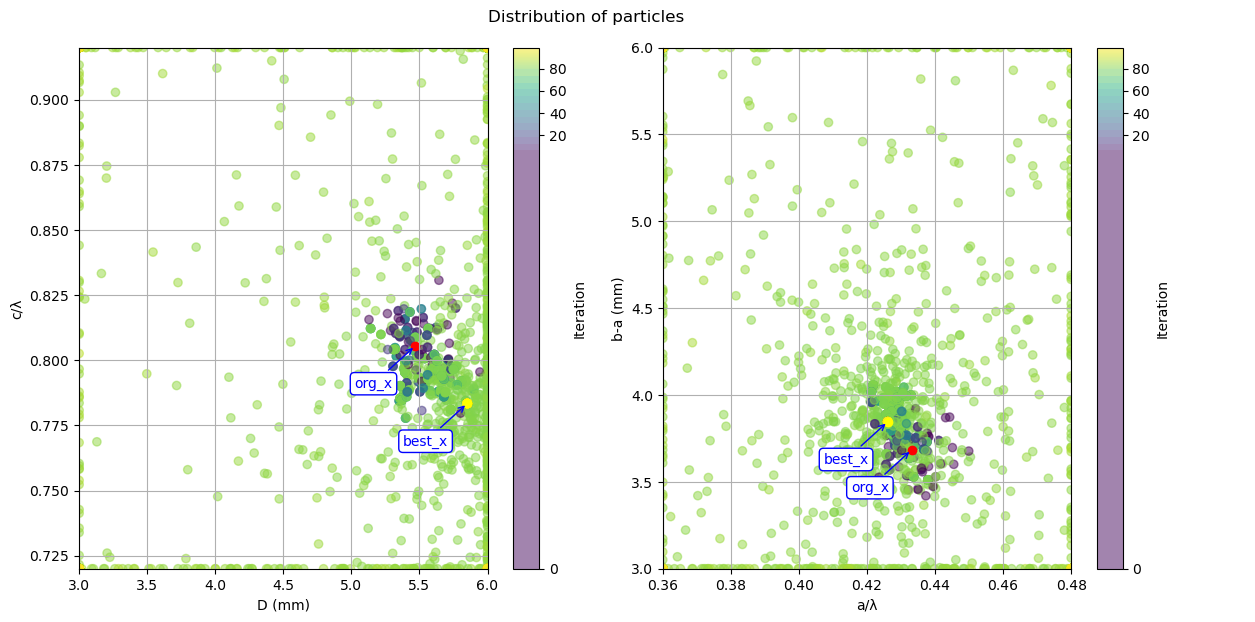

In [ ]:
import matplotlib.colors as mcolors
xL = [3, 0.36, 0.72, 3]
xU = [6, 0.48, 0.92, 6]
# [D, aa, cc, mm]
org_x = [5.4683, 0.4331, 0.8055, 3.6837]

best_x = [5.8507, 0.4261, 0.7834, 3.8458]

# 从第二行开始，每隔100行取一个样本
plot_df = df.iloc[0::1]

# 创建一个图形对象，并添加第一个子图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# 绘制第一个子图，散点图
# 获取 iter_num 范围
iter_min = plot_df["Interation"].min()
iter_max = plot_df["Interation"].max()

# 设置一个人为的“转折点”，让 <=5 占80%
threshold = 5
ratio = 0.8  # 80%

# 构建 piecewise linear normalization
def scaled_norm(val):
    """将原始iter_num值缩放到0-1之间，<=5占80%的色条"""
    val = np.asarray(val)
    return np.where(val <= threshold,
                    ratio * (val - iter_min) / (threshold - iter_min),
                    ratio + (1 - ratio) * (val - threshold) / (iter_max - threshold))

# 创建一个自定义的 Normalize 对象（需要实现 .__call__ 和 .inverse）
class CustomNormalize(mcolors.Normalize):
    def __init__(self, threshold, iter_min, iter_max, ratio=0.8):
        super().__init__(vmin=iter_min, vmax=iter_max)
        self.threshold = threshold
        self.ratio = ratio

    def __call__(self, value, clip=None):
        return scaled_norm(value)

norm = CustomNormalize(threshold=threshold, iter_min=iter_min, iter_max=iter_max, ratio=ratio)

# 使用该 norm 显示
sc1 = ax1.scatter(plot_df["D"], plot_df["cc"], c=plot_df["Interation"], cmap='viridis', norm=norm, alpha=0.5)
plt.colorbar(sc1, ax=ax1, label='Iteration')

ax1.set_xlim(xL[0], xU[0])
ax1.set_ylim(xL[2], xU[2])
ax1.set_xlabel('D (mm)')
ax1.set_ylabel('c/λ')
ax1.grid(True)

# 添加红色的散点到第一个子图中
ax1.scatter(org_x[0], org_x[2], color='red')
# 添加红色的散点到第一个子图中
ax1.scatter(best_x[0], best_x[2], color='yellow')

# 绘制第6个子图，散点图
sc6 = ax2.scatter(plot_df["aa"], plot_df["mm"], c=plot_df["Interation"], cmap='viridis', norm=norm, alpha=0.5)
plt.colorbar(sc6, ax=ax2, label='Iteration')
ax2.set_xlim(xL[1], xU[1])
ax2.set_ylim(xL[3], xU[3])
ax2.set_xlabel('a/λ')
ax2.set_ylabel('b-a (mm)')
ax2.grid(True)

# 添加红色的散点到第一个子图中
ax2.scatter(org_x[1], org_x[3], color='red')

# 添加红色的散点到第一个子图中
ax2.scatter(best_x[1], best_x[3], color='yellow',alpha=1.0)

# 在 ax1 中标注 org_x，并添加箭头
ax1.annotate('org_x', (org_x[0], org_x[2]), textcoords="offset points", xytext=(-30,-30), ha='center', fontsize=10, color='blue', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="blue", lw=1), arrowprops=dict(arrowstyle="->", color='blue'))

# 在 ax1 中标注 best_x，并添加箭头
ax1.annotate('best_x', (best_x[0], best_x[2]), textcoords="offset points", xytext=(-30,-30), ha='center', fontsize=10, color='blue', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="blue", lw=1), arrowprops=dict(arrowstyle="->", color='blue'))

# 在 ax2 中标注 org_x，并添加箭头
ax2.annotate('org_x', (org_x[1], org_x[3]), textcoords="offset points", xytext=(-30,-30), ha='center', fontsize=10, color='blue', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="blue", lw=1), arrowprops=dict(arrowstyle="->", color='blue'))

# 在 ax2 中标注 best_x，并添加箭头
ax2.annotate('best_x', (best_x[1], best_x[3]), textcoords="offset points", xytext=(-30,-30), ha='center', fontsize=10, color='blue', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="blue", lw=1), arrowprops=dict(arrowstyle="->", color='blue'))


plt.tight_layout()
plt.title('Distribution of particles                                                                                                           \n', loc='center')
plt.show()


In [ ]:
df_pca_org = df_all[['D', 'aa', 'cc','mm']]

In [ ]:
df_pca_org.shape

(5100, 4)

In [ ]:
df_pca_org.head()

D      aa      cc      mm
0  5.5031  0.4263  0.8005  3.7030
1  5.3517  0.4286  0.7844  3.8832
2  5.3517  0.4286  0.7844  3.8832
3  5.3517  0.4286  0.7844  3.8832
4  5.3517  0.4286  0.7844  3.8832

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)  # 指定降维后的维度为 2
pca.fit(df_pca_org)

# 将数据降至二维
df_pca = pca.transform(df_pca_org)

# 将降维后的数据构建成 DataFrame
df_reduced = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
df_reduced.head()

NameError: name 'df_reduced' is not defined

In [ ]:
df_all= pd.concat([df_all, df_reduced], axis=1)

NameError: name 'df_reduced' is not defined

In [ ]:
df_all.head()

D      aa      cc      mm  ID  Interation Fitness      Freq  \
0  5.5031  0.4263  0.8005  3.7030   0           0     NaN  5.750405   
1  5.3517  0.4286  0.7844  3.8832   0           1     NaN  5.738601   
2  5.3517  0.4286  0.7844  3.8832   0           2     NaN  5.738601   
3  5.3517  0.4286  0.7844  3.8832   0           3     NaN  5.738601   
4  5.3517  0.4286  0.7844  3.8832   0           4     NaN  5.738601   

     ShuntImp     rOverQ              Q  
0  18049534.0  108.47124  166399.259380  
1  18116251.0  107.42654  168638.504042  
2  18116251.0  107.42654  168638.504042  
3  18116251.0  107.42654  168638.504042  
4  18116251.0  107.42654  168638.504042

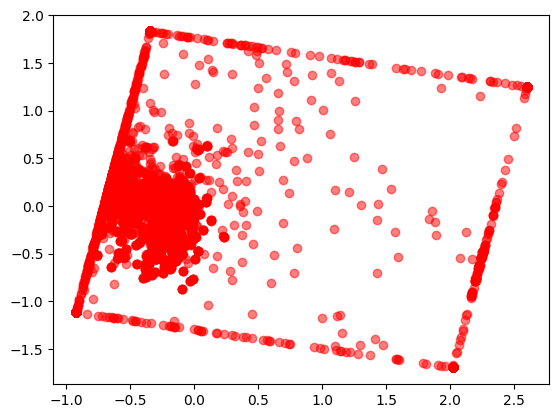

In [ ]:
plt.scatter(df_reduced['PCA1'], df_reduced['PCA2'], c='red', alpha=0.5)

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

df_pca_no_D = df_all[['aa', 'cc','mm']]

pca = PCA(n_components=1)  # 指定降维后的维度为 1
pca.fit(df_pca_no_D)

# 将数据降至二维
no_D = pca.transform(df_pca_no_D)

# 将降维后的数据构建成 DataFrame
df_no_D = pd.DataFrame(no_D, columns=['PCA_no_D'])

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

df_pca_no_aa = df_all[['D', 'cc','mm']]

pca = PCA(n_components=1)  # 指定降维后的维度为 1
pca.fit(df_pca_no_aa)

# 将数据降至二维
no_aa = pca.transform(df_pca_no_aa)

# 将降维后的数据构建成 DataFrame
df_no_aa = pd.DataFrame(no_aa, columns=['PCA_no_aa'])

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

df_pca_no_cc = df_all[['D', 'aa','mm']]

pca = PCA(n_components=1)  # 指定降维后的维度为 1
pca.fit(df_pca_no_cc)

# 将数据降至二维
no_cc = pca.transform(df_pca_no_cc)

# 将降维后的数据构建成 DataFrame
df_no_cc = pd.DataFrame(no_cc, columns=['PCA_no_cc'])

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

df_pca_no_mm = df_all[['D', 'aa','cc']]

pca = PCA(n_components=1)  # 指定降维后的维度为 1
pca.fit(df_pca_no_mm)

# 将数据降至二维
no_mm = pca.transform(df_pca_no_mm)

# 将降维后的数据构建成 DataFrame
df_no_mm = pd.DataFrame(no_mm, columns=['PCA_no_mm'])

In [ ]:
df_all= pd.concat([df_all, df_no_D, df_no_aa, df_no_cc, df_no_mm], axis=1)

In [ ]:
df_all.head()

D      aa      cc      mm  ID  Interation       Fitness      Freq  \
0  5.4661  0.4383  0.8053  3.7456   0           0  3.297633e+08  5.656306   
1  5.4671  0.4373  0.8043  3.7466   0           1  3.877174e+08  5.664114   
2  5.4681  0.4363  0.8033  3.7476   0           2  4.728381e+08  5.672251   
3  5.4691  0.4353  0.8023  3.7486   0           3  6.001282e+08  5.680212   
4  5.4701  0.4343  0.8013  3.7496   0           4  8.061153e+08  5.687729   

     ShuntImp     rOverQ      PCA1      PCA2  PCA_no_D  PCA_no_aa  PCA_no_cc  \
0  17706179.0  106.40084 -0.257151 -0.486293 -0.526740  -0.257175  -0.257260   
1  17790762.0  106.62549 -0.257946 -0.485115 -0.525738  -0.257969  -0.258050   
2  17849211.0  106.81475 -0.258742 -0.483937 -0.524736  -0.258763  -0.258839   
3  17876558.0  106.97526 -0.259537 -0.482759 -0.523734  -0.259558  -0.259629   
4  17953156.0  107.15193 -0.260333 -0.481581 -0.522732  -0.260352  -0.260418   

   PCA_no_mm  
0  -0.158572  
1  -0.159579  
2  -0.160587  
3  -0.161595  
4  -0.162602

Mean Squared Error: 0.0027750438900258005


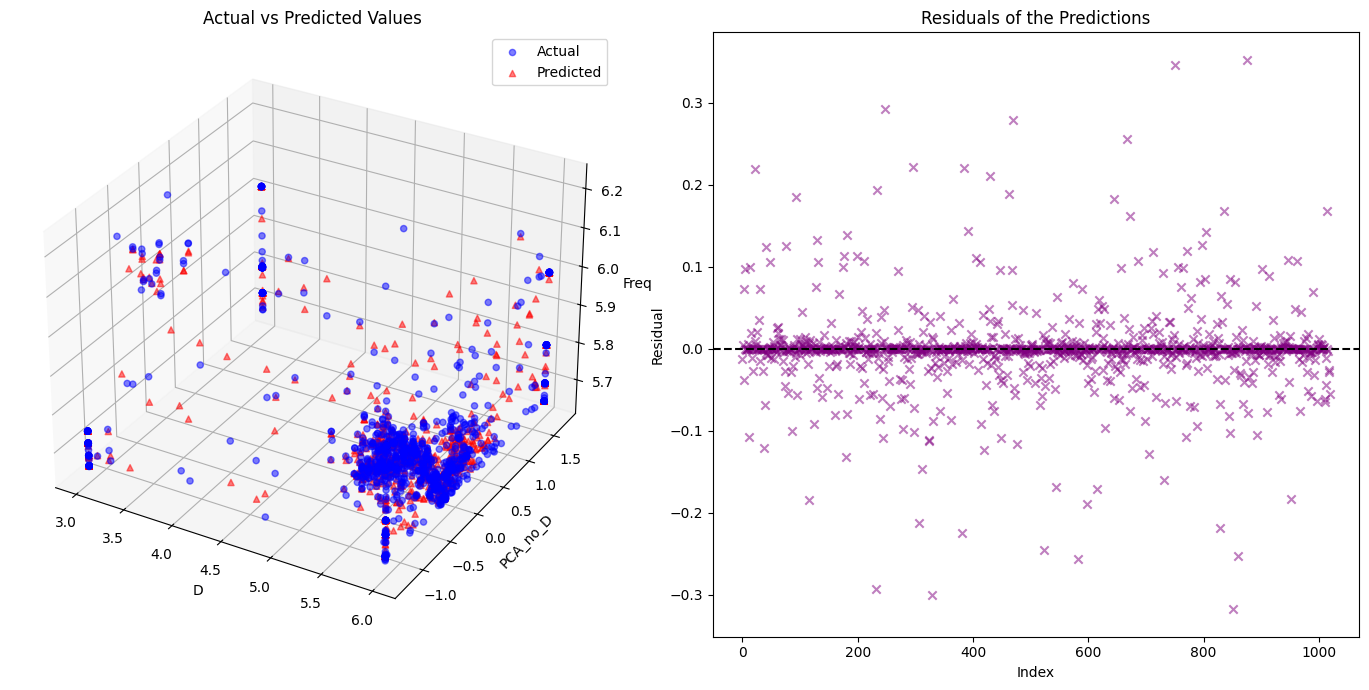

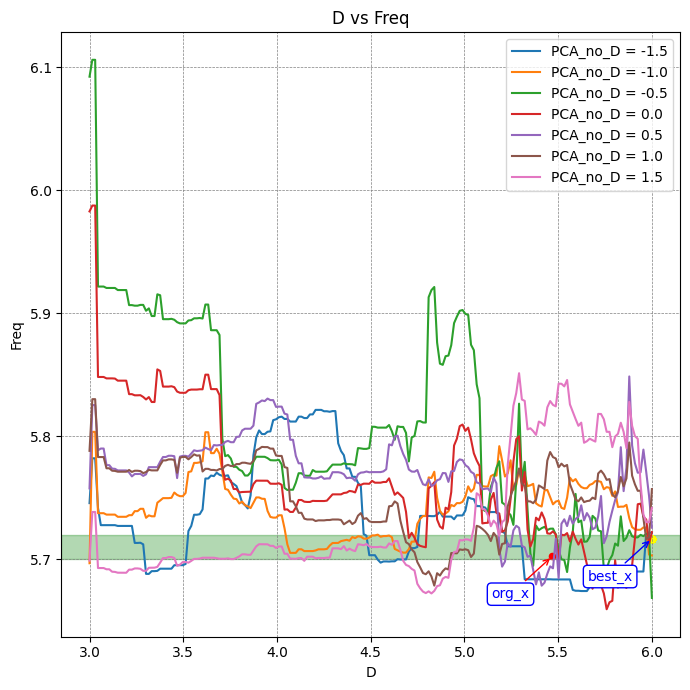

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.ticker as ticker

# 假设 df_Freq_D 已经定义，且包含'D', 'PCA_no_D', 'Freq' 列
# X.shape 为 (5100, 2)
# y.shape 为 (5100,)

# 使用示例数据集创建 DataFrame
# 你需要用实际的数据来替换这里的代码
# df_Freq_D = pd.DataFrame({
#     'D': np.random.rand(5100),
#     'PCA_no_D': np.random.rand(5100),
#     'Freq': np.random.rand(5100)
# })
# [D, aa, cc, mm]
org_x = [5.4683, 0.4331, 0.8055, 3.6837]

best_x = [5.9995, 0.4122, 0.7719, 4.4621]

matching_row = df_all[
    (df_all['D'] == best_x[0]) &
    (df_all['aa'] == best_x[1]) &
    (df_all['cc'] == best_x[2]) &
    (df_all['mm'] == best_x[3])
]

matching_row2 = df_all[
    (df_all['D'] == org_x[0]) &
    (df_all['aa'] == org_x[1]) &
    (df_all['cc'] == org_x[2]) &
    (df_all['mm'] == org_x[3])
]

df_Freq_D = df_all[['Freq', 'D', 'PCA_no_D']]

# 定义特征和目标变量
X = df_Freq_D[['D', 'PCA_no_D']]
y = df_Freq_D['Freq']

# 使用 train_test_split 进行数据集分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化并训练随机森林回归模型
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# 预测测试集
y_pred = model_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# 可视化实际值和预测值
fig = plt.figure(figsize=(14, 7))

# 创建3D散点图
ax = fig.add_subplot(121, projection='3d')
sc = ax.scatter(X_test['D'], X_test['PCA_no_D'], y_test, c='blue', marker='o', alpha=0.5, label='Actual')
ax.scatter(X_test['D'], X_test['PCA_no_D'], y_pred, c='red', marker='^', alpha=0.5, label='Predicted')

ax.set_xlabel('D')
ax.set_ylabel('PCA_no_D')
ax.set_zlabel('Freq')
ax.set_title('Actual vs Predicted Values')
ax.legend()

# 创建残差图
ax2 = fig.add_subplot(122)
residuals = y_test - y_pred
ax2.scatter(range(len(residuals)), residuals, c='purple', marker='x', alpha=0.5)
ax2.axhline(y=0, color='black', linestyle='--')
ax2.set_xlabel('Index')
ax2.set_ylabel('Residual')
ax2.set_title('Residuals of the Predictions')

plt.tight_layout()
plt.show()

# 添加 D 与 Freq 关系曲线
d_values = np.linspace(df_Freq_D['D'].min(), df_Freq_D['D'].max(), 200)

# 创建新的图形对象用于绘制曲线
plt.figure(figsize=(7, 7))


# 循环迭代不同的 PCA_no_D 值
for pca_no_d in np.arange(-1.5, 2, 0.5):
    pca_no_d_values = np.full_like(d_values, pca_no_d)
    X_for_prediction = pd.DataFrame({'D': d_values, 'PCA_no_D': pca_no_d_values})
    y_for_prediction = model_rf.predict(X_for_prediction)
    plt.plot(d_values, y_for_prediction, label=f'PCA_no_D = {pca_no_d}')

plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5, which='both')

# 添加有效解区域的色块
plt.axhspan(5.7, 5.72, color='green', alpha=0.3)

# 添加红色的散点到第一个子图中
plt.scatter(matching_row['D'], matching_row['Freq'], color='yellow', s=20)
# 添加红色的散点到第一个子图中
plt.scatter(matching_row2['D'], matching_row2['Freq'], color='red', s=20)

# 在 ax1 中标注 org_x，并添加箭头
plt.annotate('org_x', (matching_row2['D'].iloc[0], matching_row2['Freq'].iloc[0]), textcoords="offset points", xytext=(-30,-30), ha='center', fontsize=10, color='blue', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="blue", lw=1), arrowprops=dict(arrowstyle="->", color='red'))

# 在 ax1 中标注 best_x，并添加箭头
plt.annotate('best_x', (matching_row['D'].iloc[0], matching_row['Freq'].iloc[0]), textcoords="offset points", xytext=(-30,-30), ha='center', fontsize=10, color='blue', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="blue", lw=1), arrowprops=dict(arrowstyle="->", color='blue'))


plt.xlabel('D')
plt.ylabel('Freq')
plt.title('D vs Freq')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# 筛选条件：Freq 列在 5.7 和 5.72 之间，同时 rOverQ 列大于 20
filtered_pca_df = df_all[(df_all['Freq'] >= 5.7) & (df_all['Freq'] <= 5.72) & (df_all['rOverQ'] > 20)]

In [ ]:
filtered_pca_df.head()

D      aa      cc      mm  ID  Interation       Fitness      Freq  \
5  5.5092  0.4266  0.8012  3.9936   0           5  1.848451e+09  5.701859   
6  5.5094  0.4262  0.8015  3.9940   0           6  1.834248e+09  5.704397   
7  5.5093  0.4264  0.8012  3.9940   0           7  1.835118e+09  5.703183   
8  5.5083  0.4266  0.8002  3.9950   0           8  1.838261e+09  5.702775   
9  5.5073  0.4256  0.7992  3.9960   0           9  1.839988e+09  5.711037   

     ShuntImp     rOverQ      PCA1      PCA2  PCA_no_D  PCA_no_aa  PCA_no_cc  \
5  18484514.0  108.45824 -0.251666 -0.234612 -0.278725  -0.251674  -0.251739   
6  18342485.0  108.56137 -0.251784 -0.234181 -0.278325  -0.251792  -0.251858   
7  18351182.0  108.52860 -0.251687 -0.234200 -0.278324  -0.251695  -0.251760   
8  18382606.0  108.50992 -0.250519 -0.233409 -0.277323  -0.250527  -0.250585   
9  18399877.0  108.64821 -0.249352 -0.232617 -0.276321  -0.249359  -0.249413   

   PCA_no_mm  
5  -0.201713  
6  -0.201911  
7  -0.201813  
8  -0.200819  
9  -0.199826

Mean Squared Error: 8.588201987341149e-05


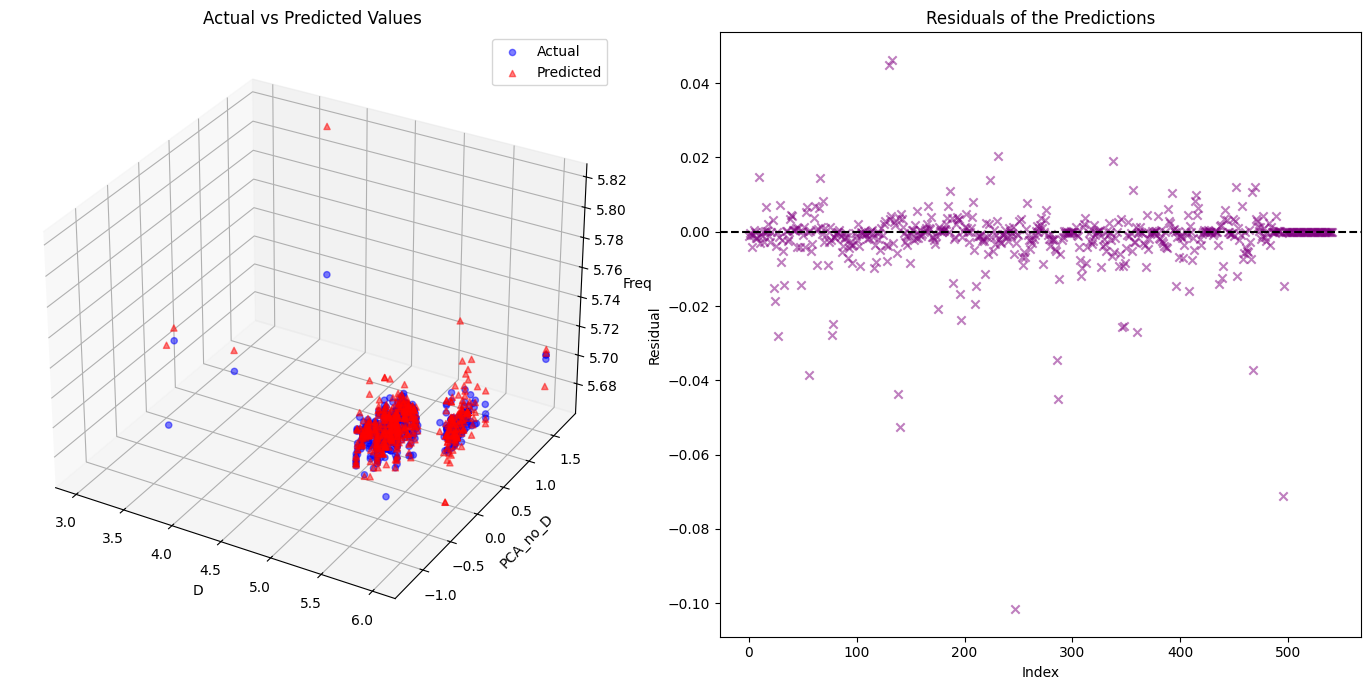

In [ ]:
X_test_feasible = filtered_pca_df[['D', 'PCA_no_D']]
y_test_feasible = filtered_pca_df['Freq']

# 预测测试集
y_pred_feasible = model_rf.predict(X_test_feasible)
mse = mean_squared_error(y_test_feasible, y_pred_feasible)
print(f"Mean Squared Error: {mse}")

# 可视化实际值和预测值
fig = plt.figure(figsize=(14, 7))

# 创建3D散点图
ax = fig.add_subplot(121, projection='3d')
sc = ax.scatter(X_test_feasible['D'], X_test_feasible['PCA_no_D'], y_test_feasible, c='blue', marker='o', alpha=0.5, label='Actual')
ax.scatter(X_test_feasible['D'], X_test_feasible['PCA_no_D'], y_pred_feasible, c='red', marker='^', alpha=0.5, label='Predicted')
ax.set_xlabel('D')
ax.set_ylabel('PCA_no_D')
ax.set_zlabel('Freq')
ax.set_title('Actual vs Predicted Values')
ax.legend()

# 创建残差图
ax2 = fig.add_subplot(122)
residuals = y_test_feasible - y_pred_feasible
ax2.scatter(range(len(residuals)), residuals, c='purple', marker='x', alpha=0.5)
ax2.axhline(y=0, color='black', linestyle='--')
ax2.set_xlabel('Index')
ax2.set_ylabel('Residual')
ax2.set_title('Residuals of the Predictions')

plt.tight_layout()
plt.show()

In [ ]:
df_all.head()

D      aa      cc      mm  ID  Interation       Fitness      Freq  \
0  5.4661  0.4383  0.8053  3.7456   0           0  3.297633e+08  5.656306   
1  5.4671  0.4373  0.8043  3.7466   0           1  3.877174e+08  5.664114   
2  5.4681  0.4363  0.8033  3.7476   0           2  4.728381e+08  5.672251   
3  5.4691  0.4353  0.8023  3.7486   0           3  6.001282e+08  5.680212   
4  5.4701  0.4343  0.8013  3.7496   0           4  8.061153e+08  5.687729   

     ShuntImp     rOverQ      PCA1      PCA2  PCA_no_D  PCA_no_aa  PCA_no_cc  \
0  17706179.0  106.40084 -0.257151 -0.486293 -0.526740  -0.257175  -0.257260   
1  17790762.0  106.62549 -0.257946 -0.485115 -0.525738  -0.257969  -0.258050   
2  17849211.0  106.81475 -0.258742 -0.483937 -0.524736  -0.258763  -0.258839   
3  17876558.0  106.97526 -0.259537 -0.482759 -0.523734  -0.259558  -0.259629   
4  17953156.0  107.15193 -0.260333 -0.481581 -0.522732  -0.260352  -0.260418   

   PCA_no_mm  
0  -0.158572  
1  -0.159579  
2  -0.160587  
3  -0.161595  
4  -0.162602

Mean Squared Error: 0.0024364143003355993


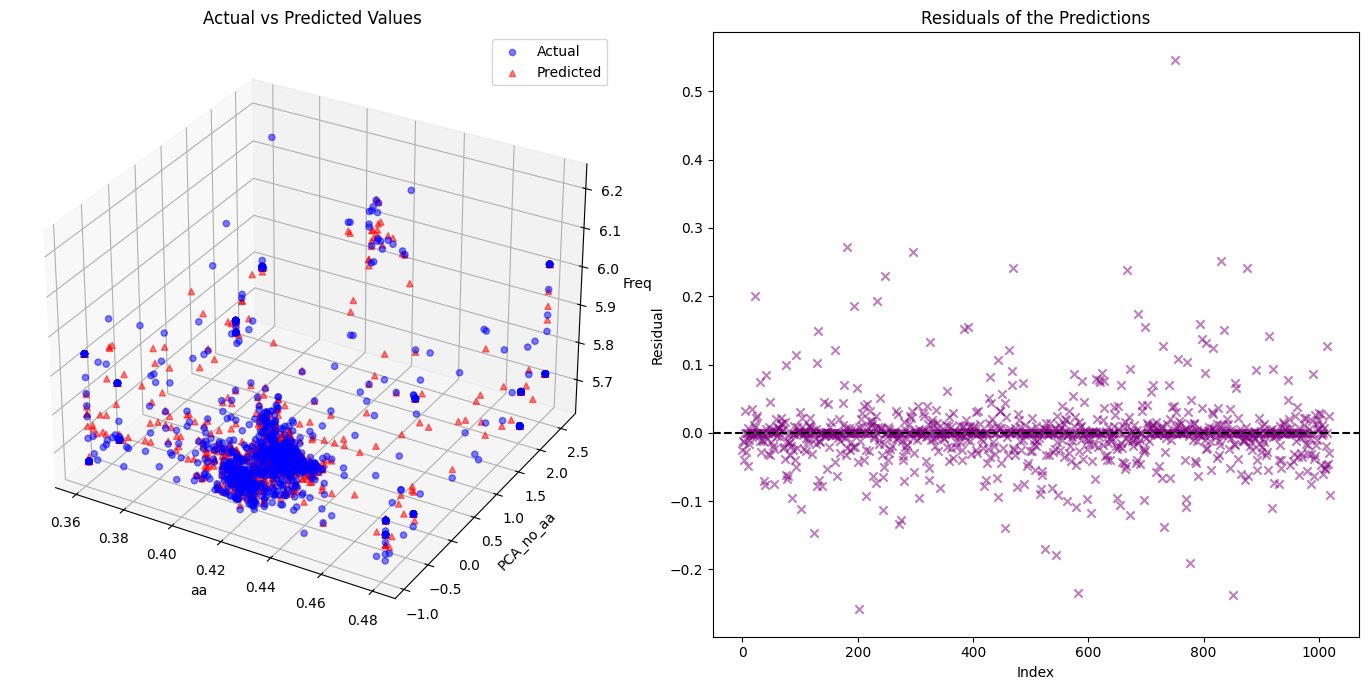

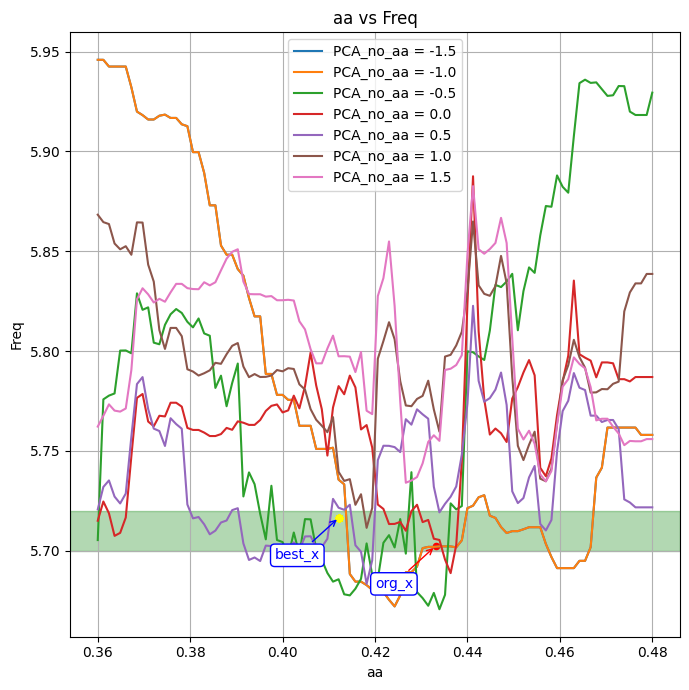

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 假设 df_Freq_D 已经定义，且包含'D', 'PCA_no_D', 'Freq' 列
# X.shape 为 (5100, 2)
# y.shape 为 (5100,)

# 使用示例数据集创建 DataFrame
# 你需要用实际的数据来替换这里的代码
# df_Freq_D = pd.DataFrame({
#     'D': np.random.rand(5100),
#     'PCA_no_D': np.random.rand(5100),
#     'Freq': np.random.rand(5100)
# })

df_Freq_aa = df_all[['Freq', 'aa', 'PCA_no_aa']]

# 定义特征和目标变量
X = df_Freq_aa[['aa', 'PCA_no_aa']]
y = df_Freq_aa['Freq']

# 使用 train_test_split 进行数据集分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化并训练随机森林回归模型
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# 预测测试集
y_pred = model_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# 可视化实际值和预测值
fig = plt.figure(figsize=(14, 7))

# 创建3D散点图
ax = fig.add_subplot(121, projection='3d')
sc = ax.scatter(X_test['aa'], X_test['PCA_no_aa'], y_test, c='blue', marker='o', alpha=0.5, label='Actual')
ax.scatter(X_test['aa'], X_test['PCA_no_aa'], y_pred, c='red', marker='^', alpha=0.5, label='Predicted')
ax.set_xlabel('aa')
ax.set_ylabel('PCA_no_aa')
ax.set_zlabel('Freq')
ax.set_title('Actual vs Predicted Values')
ax.legend()

# 创建残差图
ax2 = fig.add_subplot(122)
residuals = y_test - y_pred
ax2.scatter(range(len(residuals)), residuals, c='purple', marker='x', alpha=0.5)
ax2.axhline(y=0, color='black', linestyle='--')
ax2.set_xlabel('Index')
ax2.set_ylabel('Residual')
ax2.set_title('Residuals of the Predictions')

plt.tight_layout()
plt.show()

# 添加 D 与 Freq 关系曲线
aa_values = np.linspace(df_Freq_aa['aa'].min(), df_Freq_aa['aa'].max(), 100)

# 创建新的图形对象用于绘制曲线
plt.figure(figsize=(7, 7))

# 循环迭代不同的 PCA_no_D 值
for pca_no_aa in np.arange(-1.5, 2, 0.5):
    pca_no_aa_values = np.full_like(aa_values, pca_no_aa)
    X_for_prediction = pd.DataFrame({'aa': aa_values, 'PCA_no_aa': pca_no_aa_values})
    y_for_prediction = model_rf.predict(X_for_prediction)
    plt.plot(aa_values, y_for_prediction, label=f'PCA_no_aa = {pca_no_aa}')

# [D, aa, cc, mm]
org_x = [5.4683, 0.4331, 0.8055, 3.6837]

best_x = [5.9995, 0.4122, 0.7719, 4.4621]

matching_row = df_all[
    (df_all['D'] == best_x[0]) &
    (df_all['aa'] == best_x[1]) &
    (df_all['cc'] == best_x[2]) &
    (df_all['mm'] == best_x[3])
]

matching_row2 = df_all[
    (df_all['D'] == org_x[0]) &
    (df_all['aa'] == org_x[1]) &
    (df_all['cc'] == org_x[2]) &
    (df_all['mm'] == org_x[3])
]

# 添加有效解区域的色块
plt.axhspan(5.7, 5.72, color='green', alpha=0.3)

# 添加红色的散点到第一个子图中
plt.scatter(matching_row['aa'], matching_row['Freq'], color='yellow', s=20)
# 添加红色的散点到第一个子图中
plt.scatter(matching_row2['aa'], matching_row2['Freq'], color='red', s=20)

# 在 ax1 中标注 org_x，并添加箭头
plt.annotate('org_x', (matching_row2['aa'].iloc[0], matching_row2['Freq'].iloc[0]), textcoords="offset points", xytext=(-30,-30), ha='center', fontsize=10, color='blue', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="blue", lw=1), arrowprops=dict(arrowstyle="->", color='red'))

# 在 ax1 中标注 best_x，并添加箭头
plt.annotate('best_x', (matching_row['aa'].iloc[0], matching_row['Freq'].iloc[0]), textcoords="offset points", xytext=(-30,-30), ha='center', fontsize=10, color='blue', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="blue", lw=1), arrowprops=dict(arrowstyle="->", color='blue'))



plt.xlabel('aa')
plt.ylabel('Freq')
plt.title('aa vs Freq')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Mean Squared Error: 0.0021626037528688306


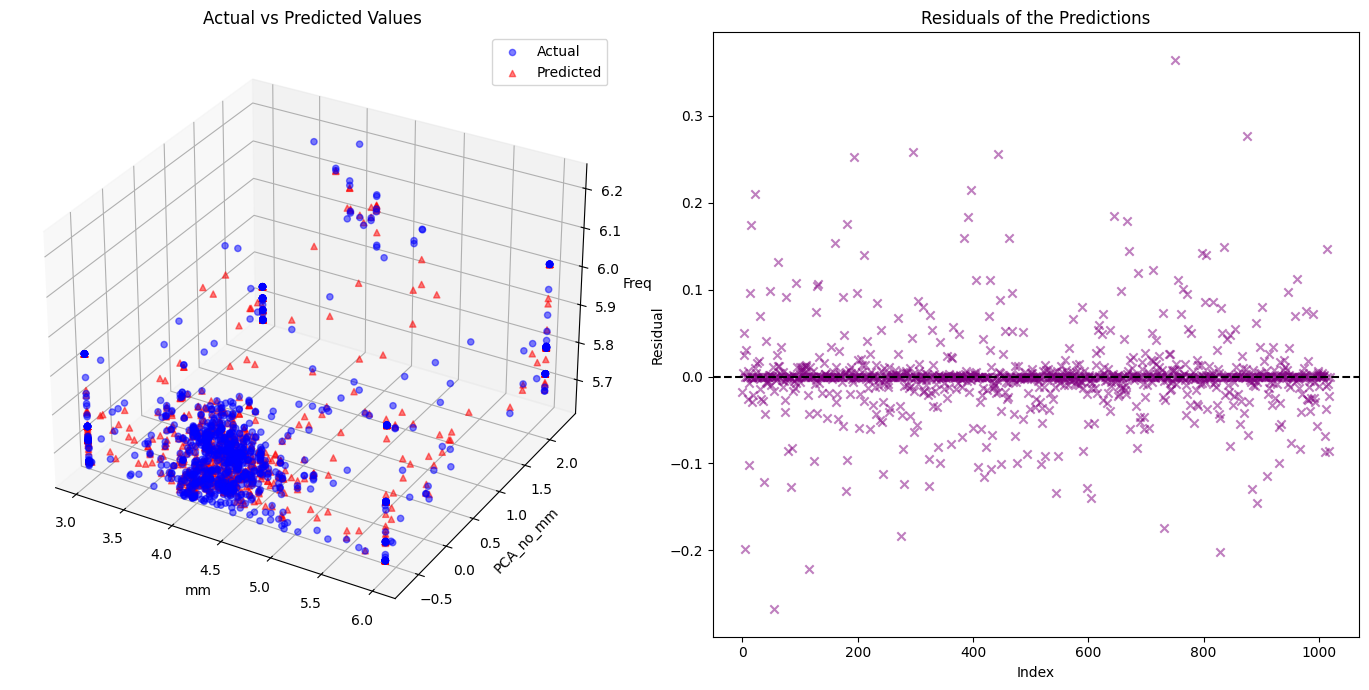

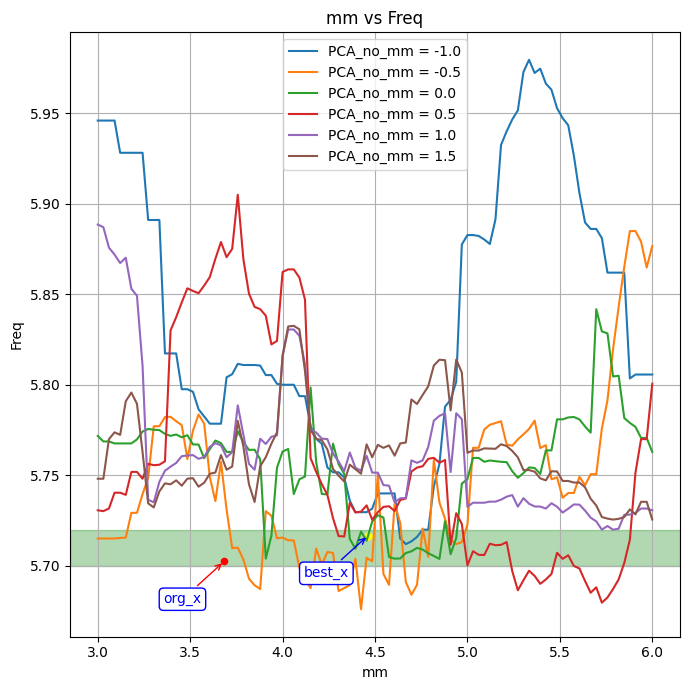

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 假设 df_Freq_D 已经定义，且包含'D', 'PCA_no_D', 'Freq' 列
# X.shape 为 (5100, 2)
# y.shape 为 (5100,)

# 使用示例数据集创建 DataFrame
# 你需要用实际的数据来替换这里的代码
# df_Freq_D = pd.DataFrame({
#     'D': np.random.rand(5100),
#     'PCA_no_D': np.random.rand(5100),
#     'Freq': np.random.rand(5100)
# })

df_Freq_mm = df_all[['Freq', 'mm', 'PCA_no_mm']]

# 定义特征和目标变量
X = df_Freq_mm[['mm', 'PCA_no_mm']]
y = df_Freq_mm['Freq']

# 使用 train_test_split 进行数据集分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化并训练随机森林回归模型
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# 预测测试集
y_pred = model_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# 可视化实际值和预测值
fig = plt.figure(figsize=(14, 7))

# 创建3D散点图
ax = fig.add_subplot(121, projection='3d')
sc = ax.scatter(X_test['mm'], X_test['PCA_no_mm'], y_test, c='blue', marker='o', alpha=0.5, label='Actual')
ax.scatter(X_test['mm'], X_test['PCA_no_mm'], y_pred, c='red', marker='^', alpha=0.5, label='Predicted')
ax.set_xlabel('mm')
ax.set_ylabel('PCA_no_mm')
ax.set_zlabel('Freq')
ax.set_title('Actual vs Predicted Values')
ax.legend()

# 创建残差图
ax2 = fig.add_subplot(122)
residuals = y_test - y_pred
ax2.scatter(range(len(residuals)), residuals, c='purple', marker='x', alpha=0.5)
ax2.axhline(y=0, color='black', linestyle='--')
ax2.set_xlabel('Index')
ax2.set_ylabel('Residual')
ax2.set_title('Residuals of the Predictions')

plt.tight_layout()
plt.show()

# 添加 D 与 Freq 关系曲线
mm_values = np.linspace(df_Freq_mm['mm'].min(), df_Freq_mm['mm'].max(), 100)

# 创建新的图形对象用于绘制曲线
plt.figure(figsize=(7, 7))

# 循环迭代不同的 PCA_no_D 值
for pca_no_mm in np.arange(-1, 2.0, 0.5):
    pca_no_mm_values = np.full_like(mm_values, pca_no_mm)
    X_for_prediction = pd.DataFrame({'mm': mm_values, 'PCA_no_mm': pca_no_mm_values})
    y_for_prediction = model_rf.predict(X_for_prediction)
    plt.plot(mm_values, y_for_prediction, label=f'PCA_no_mm = {pca_no_mm}')

# [D, aa, cc, mm]
org_x = [5.4683, 0.4331, 0.8055, 3.6837]

best_x = [5.9995, 0.4122, 0.7719, 4.4621]

matching_row = df_all[
    (df_all['D'] == best_x[0]) &
    (df_all['aa'] == best_x[1]) &
    (df_all['cc'] == best_x[2]) &
    (df_all['mm'] == best_x[3])
]

matching_row2 = df_all[
    (df_all['D'] == org_x[0]) &
    (df_all['aa'] == org_x[1]) &
    (df_all['cc'] == org_x[2]) &
    (df_all['mm'] == org_x[3])
]

# 添加有效解区域的色块
plt.axhspan(5.7, 5.72, color='green', alpha=0.3)

# 添加红色的散点到第一个子图中
plt.scatter(matching_row['mm'], matching_row['Freq'], color='yellow', s=20)
# 添加红色的散点到第一个子图中
plt.scatter(matching_row2['mm'], matching_row2['Freq'], color='red', s=20)

# 在 ax1 中标注 org_x，并添加箭头
plt.annotate('org_x', (matching_row2['mm'].iloc[0], matching_row2['Freq'].iloc[0]), textcoords="offset points", xytext=(-30,-30), ha='center', fontsize=10, color='blue', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="blue", lw=1), arrowprops=dict(arrowstyle="->", color='red'))

# 在 ax1 中标注 best_x，并添加箭头
plt.annotate('best_x', (matching_row['mm'].iloc[0], matching_row['Freq'].iloc[0]), textcoords="offset points", xytext=(-30,-30), ha='center', fontsize=10, color='blue', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="blue", lw=1), arrowprops=dict(arrowstyle="->", color='blue'))


plt.xlabel('mm')
plt.ylabel('Freq')
plt.title('mm vs Freq')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Mean Squared Error: 0.002816477412265955


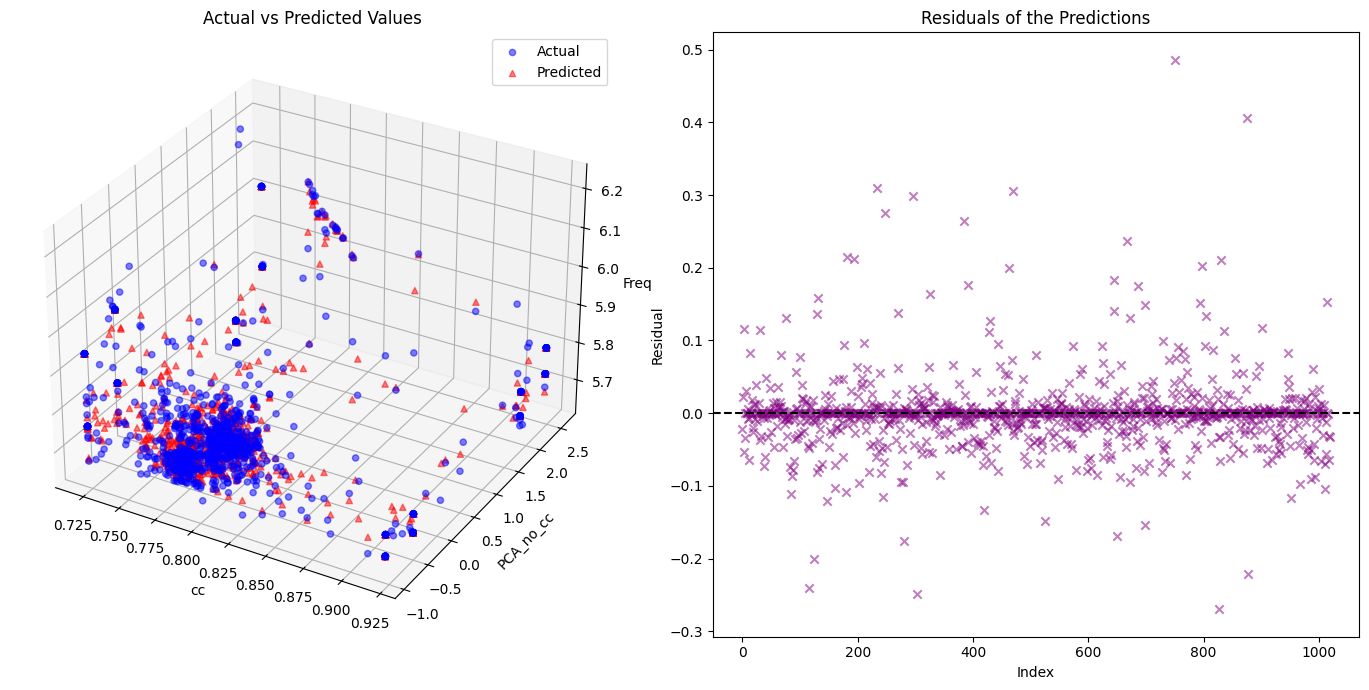

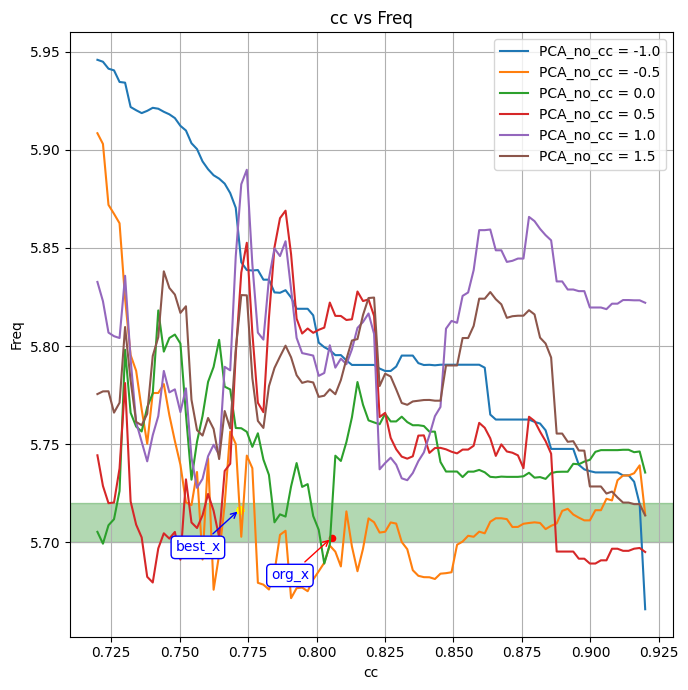

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 假设 df_Freq_D 已经定义，且包含'D', 'PCA_no_D', 'Freq' 列
# X.shape 为 (5100, 2)
# y.shape 为 (5100,)

# 使用示例数据集创建 DataFrame
# 你需要用实际的数据来替换这里的代码
# df_Freq_D = pd.DataFrame({
#     'D': np.random.rand(5100),
#     'PCA_no_D': np.random.rand(5100),
#     'Freq': np.random.rand(5100)
# })

df_Freq_cc = df_all[['Freq', 'cc', 'PCA_no_cc']]

# 定义特征和目标变量
X = df_Freq_cc[['cc', 'PCA_no_cc']]
y = df_Freq_cc['Freq']

# 使用 train_test_split 进行数据集分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化并训练随机森林回归模型
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# 预测测试集
y_pred = model_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# 可视化实际值和预测值
fig = plt.figure(figsize=(14, 7))

# 创建3D散点图
ax = fig.add_subplot(121, projection='3d')
sc = ax.scatter(X_test['cc'], X_test['PCA_no_cc'], y_test, c='blue', marker='o', alpha=0.5, label='Actual')
ax.scatter(X_test['cc'], X_test['PCA_no_cc'], y_pred, c='red', marker='^', alpha=0.5, label='Predicted')
ax.set_xlabel('cc')
ax.set_ylabel('PCA_no_cc')
ax.set_zlabel('Freq')
ax.set_title('Actual vs Predicted Values')
ax.legend()

# 创建残差图
ax2 = fig.add_subplot(122)
residuals = y_test - y_pred
ax2.scatter(range(len(residuals)), residuals, c='purple', marker='x', alpha=0.5)
ax2.axhline(y=0, color='black', linestyle='--')
ax2.set_xlabel('Index')
ax2.set_ylabel('Residual')
ax2.set_title('Residuals of the Predictions')

plt.tight_layout()
plt.show()

# 添加 D 与 Freq 关系曲线
cc_values = np.linspace(df_Freq_cc['cc'].min(), df_Freq_cc['cc'].max(), 100)

# 创建新的图形对象用于绘制曲线
plt.figure(figsize=(7, 7))

# 循环迭代不同的 PCA_no_D 值
for pca_no_cc in np.arange(-1, 2.0, 0.5):
    pca_no_cc_values = np.full_like(cc_values, pca_no_cc)
    X_for_prediction = pd.DataFrame({'cc': cc_values, 'PCA_no_cc': pca_no_cc_values})
    y_for_prediction = model_rf.predict(X_for_prediction)
    plt.plot(cc_values, y_for_prediction, label=f'PCA_no_cc = {pca_no_cc}')

# [D, aa, cc, mm]
org_x = [5.4683, 0.4331, 0.8055, 3.6837]

best_x = [5.9995, 0.4122, 0.7719, 4.4621]

matching_row = df_all[
    (df_all['D'] == best_x[0]) &
    (df_all['aa'] == best_x[1]) &
    (df_all['cc'] == best_x[2]) &
    (df_all['mm'] == best_x[3])
]

matching_row2 = df_all[
    (df_all['D'] == org_x[0]) &
    (df_all['aa'] == org_x[1]) &
    (df_all['cc'] == org_x[2]) &
    (df_all['mm'] == org_x[3])
]

# 添加有效解区域的色块
plt.axhspan(5.7, 5.72, color='green', alpha=0.3)

# 添加红色的散点到第一个子图中
plt.scatter(matching_row['cc'], matching_row['Freq'], color='yellow', s=20)
# 添加红色的散点到第一个子图中
plt.scatter(matching_row2['cc'], matching_row2['Freq'], color='red', s=20)

# 在 ax1 中标注 org_x，并添加箭头
plt.annotate('org_x', (matching_row2['cc'].iloc[0], matching_row2['Freq'].iloc[0]), textcoords="offset points", xytext=(-30,-30), ha='center', fontsize=10, color='blue', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="blue", lw=1), arrowprops=dict(arrowstyle="->", color='red'))

# 在 ax1 中标注 best_x，并添加箭头
plt.annotate('best_x', (matching_row['cc'].iloc[0], matching_row['Freq'].iloc[0]), textcoords="offset points", xytext=(-30,-30), ha='center', fontsize=10, color='blue', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="blue", lw=1), arrowprops=dict(arrowstyle="->", color='blue'))


plt.xlabel('cc')
plt.ylabel('Freq')
plt.title('cc vs Freq')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
df_shuntImp_x = df_all[['ShuntImp', 'D', 'aa', 'cc', 'mm']]

In [ ]:
max_shuntImp = filtered_pca_df[filtered_pca_df['ShuntImp'] == filtered_pca_df['ShuntImp'].max()]

In [ ]:
import pandas as pd
import os
target_dir = 'history'

# 定义文件名的通配符模式
gb_fit_file = os.path.join('history', "History_Group_Fitness.txt")
deap_fit_file = os.path.join('./', "deap_fitness.txt")

df_gb_fit = pd.DataFrame()  # 创建空的DataFrame
deap_gb_fit = pd.DataFrame()  # 创建空的DataFrame

deap_float_values = []
# Open the file and read each line
with open(deap_fit_file, 'r') as file:
    # Read each line in the file
    for line in file:
        # Convert the line to a float and append it to the list
        deap_float_values.append(float(line.strip()))

    deap_gb_fit = pd.DataFrame(deap_float_values, columns=['deap_Fitness'])

float_values = []

# Open the file and read each line
with open(gb_fit_file, 'r') as file:
    # Read each line in the file
    for line in file:
        # Convert the line to a float and append it to the list
        float_values.append(float(line.strip()))

    df_gb_fit = pd.DataFrame(float_values, columns=['Fitness'])

In [ ]:
deap_gb_fit.head()

deap_Fitness
0    18216845.0
1    18245435.0
2    18289001.0
3    18289001.0
4    18289001.0

In [ ]:
df_gb_fit.head()

Fitness
0  1.830881e+09
1  1.832657e+09
2  1.832657e+09
3  1.832657e+09
4  1.832657e+09

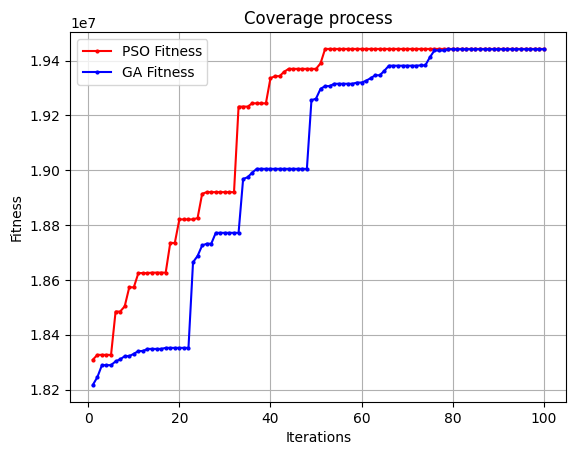

In [ ]:
import matplotlib.pyplot as plt

# 假设 df_gb_fit 和 deap_gb_fit 是已有的 pandas DataFrame
# 并且包含名为 'Fitness' 和 'deap_Fitness' 的列。

# Create x-axis values (assuming consecutive integers for simplicity)
iterations = range(1, 101)

# Plot the second curve
# Plot the first curve
plt.plot(iterations, df_gb_fit['Fitness']/100, marker='o', markersize=2, color='red', linestyle='-', label='PSO Fitness')
plt.plot(iterations, deap_gb_fit['deap_Fitness'], marker='o', markersize=2, color='blue', linestyle='-', label='GA Fitness')

# 找到PSO Fitness的最大值及其坐标
max_pso_fitness = max(df_gb_fit['Fitness'])
max_pso_iter = df_gb_fit['Fitness'].argmax()

# Add labels and title
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.title('Coverage process')

# Add legend to distinguish the curves
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


In [ ]:
df_all.head()

D      aa      cc      mm  ID  Interation       Fitness      Freq  \
0  5.4661  0.4383  0.8053  3.7456   0           0  3.297633e+08  5.656306   
1  5.4671  0.4373  0.8043  3.7466   0           1  3.877174e+08  5.664114   
2  5.4681  0.4363  0.8033  3.7476   0           2  4.728381e+08  5.672251   
3  5.4691  0.4353  0.8023  3.7486   0           3  6.001282e+08  5.680212   
4  5.4701  0.4343  0.8013  3.7496   0           4  8.061153e+08  5.687729   

     ShuntImp     rOverQ      PCA1      PCA2  PCA_no_D  PCA_no_aa  PCA_no_cc  \
0  17706179.0  106.40084 -0.257151 -0.486293 -0.526740  -0.257175  -0.257260   
1  17790762.0  106.62549 -0.257946 -0.485115 -0.525738  -0.257969  -0.258050   
2  17849211.0  106.81475 -0.258742 -0.483937 -0.524736  -0.258763  -0.258839   
3  17876558.0  106.97526 -0.259537 -0.482759 -0.523734  -0.259558  -0.259629   
4  17953156.0  107.15193 -0.260333 -0.481581 -0.522732  -0.260352  -0.260418   

   PCA_no_mm  fitness_normal  
0  -0.158572      17706179.0  
1  -0.159579      17790762.0  
2  -0.160587      17849211.0  
3  -0.161595      17876558.0  
4  -0.162602      17953156.0

In [ ]:
# 定义文件名的通配符模式
his_dis_files = sorted(glob.glob(os.path.join('history', "History_Personal_Distance*")), 
                   key=lambda x: int(''.join(filter(str.isdigit, x))))

df_dis = pd.DataFrame()  # 创建空的DataFrame

for file_item in his_dis_files:
    float_values = []
    # Open the file and read each line
    with open(file_item, 'r') as file:
        # Read each line in the file
        for line in file:
            # Convert the line to a float and append it to the list
            float_values.append(float(line.strip()))

        # 创建临时DataFrame，并为每列指定列名
        temp_df = pd.DataFrame(float_values, columns=['Distance'])

        # 将临时DataFrame添加到主DataFrame中
        df_dis = pd.concat([df_dis, temp_df], ignore_index=True)


In [ ]:
df_dis.shape

(5100, 1)

In [ ]:
df_all = pd.concat([df_all, df_dis], axis=1)

In [ ]:
df_inter26_gb = df_all[(df_all['Interation'] == 33) & (df_all['Fitness'] == 1923228900.0)]

In [ ]:
df_inter26_gb.head()

D      aa      cc      mm  ID  Interation       Fitness      Freq  \
1433  5.9997  0.4185  0.7812  4.0768  14          33  1.923229e+09  5.718622   

        ShuntImp     rOverQ      PCA1      PCA2  PCA_no_D  PCA_no_aa  \
1433  19232289.0  112.87736 -0.717041 -0.058348 -0.195494  -0.717039   

      PCA_no_cc  PCA_no_mm  fitness_normal  Distance  
1433  -0.716996  -0.692338      19232289.0       0.0

In [ ]:
# 按 Distance 进行降序排序
sorted_iter26_df = df_all[df_all['Interation'] == 33].sort_values(by='Distance', ascending=False)

# 选择第 25 到 30 行的数据
iter26_clu_df = sorted_iter26_df.iloc[40:45]
# 选择第 25 到 30 行的数据
iter26_dis_df = sorted_iter26_df.iloc[15:20]

# 按 Distance 进行降序排序
sorted_iter27_df = df_all[df_all['Interation'] == 34].sort_values(by='Distance', ascending=False)

# 选择第 25 到 30 行的数据
iter27_clu_df = sorted_iter27_df.iloc[40:45]
# 选择第 25 到 30 行的数据
iter27_dis_df = sorted_iter27_df.iloc[15:20]


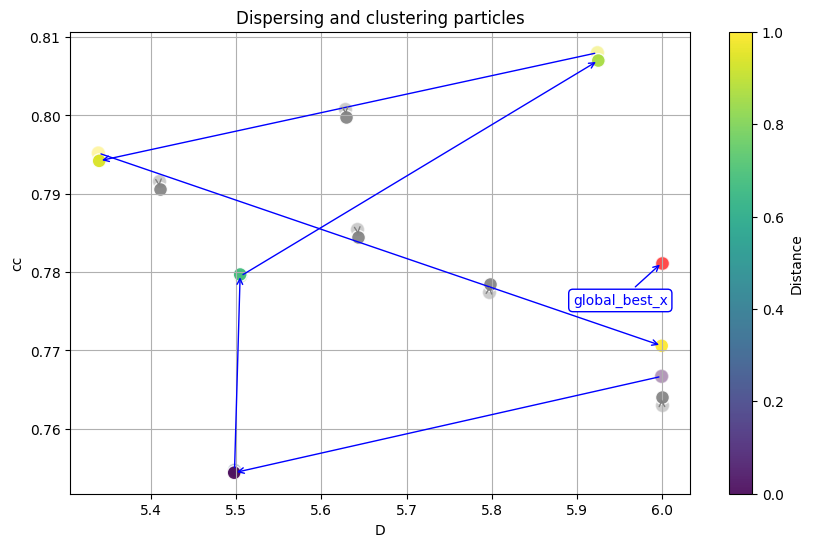

In [ ]:
# 绘制散点图
plt.figure(figsize=(10, 6))
scatter = plt.scatter(iter26_dis_df['D'], iter26_dis_df['cc'], c=iter26_dis_df['Distance'], cmap='viridis', s=100, alpha=0.4, edgecolors='w')
scatter = plt.scatter(iter27_dis_df['D'], iter27_dis_df['cc'], c=iter27_dis_df['Distance'], cmap='viridis', s=100, alpha=0.9, edgecolors='w')
for i in range(len(iter26_dis_df)):
    plt.annotate('', xy=(iter27_dis_df['D'].iloc[i], iter27_dis_df['cc'].iloc[i]), 
                 xytext=(iter26_dis_df['D'].iloc[i], iter26_dis_df['cc'].iloc[i]),
                 arrowprops=dict(arrowstyle="->", color='blue'))

scatter = plt.scatter(iter26_clu_df['D'], iter26_clu_df['cc'], c='gray', s=100, alpha=0.4, edgecolors='w')
scatter = plt.scatter(iter27_clu_df['D'], iter27_clu_df['cc'], c='gray', s=100, alpha=0.9, edgecolors='w')
for i in range(len(iter26_clu_df)):
    plt.annotate('', xy=(iter27_clu_df['D'].iloc[i], iter27_clu_df['cc'].iloc[i]), 
                 xytext=(iter26_clu_df['D'].iloc[i], iter26_clu_df['cc'].iloc[i]),
                 arrowprops=dict(arrowstyle="->", color='gray'))
plt.scatter(df_inter26_gb['D'], df_inter26_gb['cc'], c='red', s=100, alpha=0.7, edgecolors='w')

# 在 ax1 中标注 best_x，并添加箭头
plt.annotate('global_best_x', (df_inter26_gb['D'].iloc[0], df_inter26_gb['cc'].iloc[0]), textcoords="offset points", xytext=(-30,-30), ha='center', fontsize=10, color='blue', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="blue", lw=1), arrowprops=dict(arrowstyle="->", color='blue'))

plt.colorbar(scatter, label='Distance')
plt.xlabel('D')
plt.ylabel('cc')
plt.title('Dispersing and clustering particles')
plt.grid(True)
plt.show()

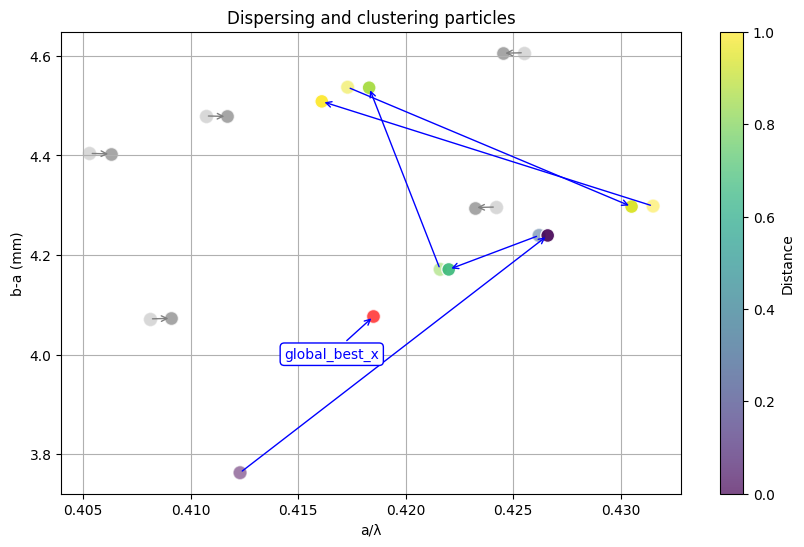

In [ ]:
# 绘制散点图
plt.figure(figsize=(10, 6))
scatter = plt.scatter(iter26_dis_df['aa'], iter26_dis_df['mm'], c=iter26_dis_df['Distance'], cmap='viridis', s=100, alpha=0.5, edgecolors='w')
scatter = plt.scatter(iter27_dis_df['aa'], iter27_dis_df['mm'], c=iter27_dis_df['Distance'], cmap='viridis', s=100, alpha=0.9, edgecolors='w')

for i in range(len(iter26_dis_df)):
    plt.annotate('', xy=(iter27_dis_df['aa'].iloc[i], iter27_dis_df['mm'].iloc[i]), 
                 xytext=(iter26_dis_df['aa'].iloc[i], iter26_dis_df['mm'].iloc[i]),
                 arrowprops=dict(arrowstyle="->", color='blue'))

scatter = plt.scatter(iter26_clu_df['aa'], iter26_clu_df['mm'], c='gray', s=100, alpha=0.3, edgecolors='w')
scatter = plt.scatter(iter27_clu_df['aa'], iter27_clu_df['mm'], c='gray', s=100, alpha=0.7, edgecolors='w')

for i in range(len(iter26_clu_df)):
    plt.annotate('', xy=(iter27_clu_df['aa'].iloc[i], iter27_clu_df['mm'].iloc[i]), 
                 xytext=(iter26_clu_df['aa'].iloc[i], iter26_clu_df['mm'].iloc[i]),
                 arrowprops=dict(arrowstyle="->", color='gray'))
plt.scatter(df_inter26_gb['aa'], df_inter26_gb['mm'], c='red', s=100, alpha=0.7, edgecolors='w')
# 在 ax1 中标注 best_x，并添加箭头
plt.annotate('global_best_x', (df_inter26_gb['aa'].iloc[0], df_inter26_gb['mm'].iloc[0]), textcoords="offset points", xytext=(-30,-30), ha='center', fontsize=10, color='blue', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="blue", lw=1), arrowprops=dict(arrowstyle="->", color='blue'))

plt.colorbar(scatter, label='Distance')
plt.xlabel('a/λ')
plt.ylabel('b-a (mm)')
plt.title('Dispersing and clustering particles')
plt.grid(True)
plt.show()

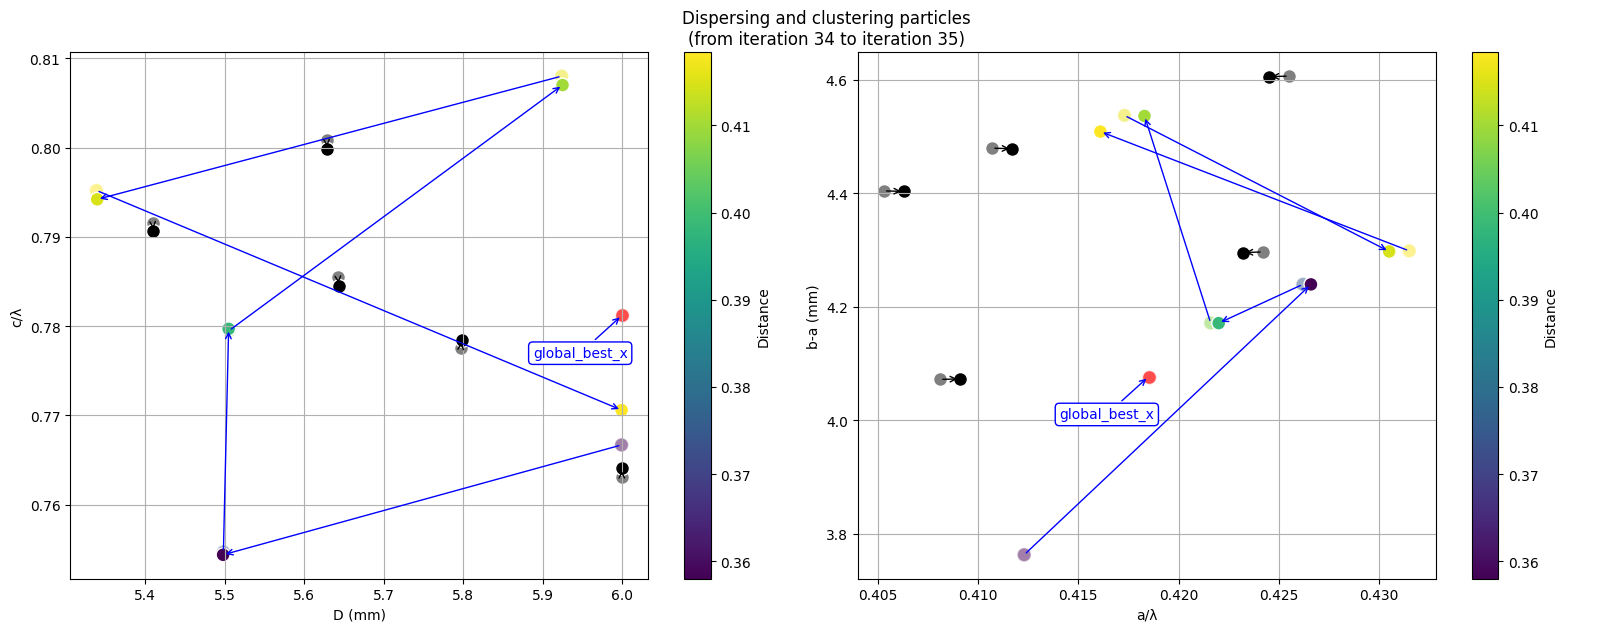

In [ ]:
# 创建包含两个子图的图形
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
scatter = ax1.scatter(iter26_dis_df['D'], iter26_dis_df['cc'], c=iter26_dis_df['Distance'], cmap='viridis', s=100, alpha=0.5, edgecolors='w')
scatter_c = ax1.scatter(iter27_dis_df['D'], iter27_dis_df['cc'], c=iter27_dis_df['Distance'], cmap='viridis', s=100, alpha=1.0, edgecolors='w')
for i in range(len(iter26_dis_df)):
    ax1.annotate('', xy=(iter27_dis_df['D'].iloc[i], iter27_dis_df['cc'].iloc[i]), 
                 xytext=(iter26_dis_df['D'].iloc[i], iter26_dis_df['cc'].iloc[i]),
                 arrowprops=dict(arrowstyle="->", color='blue'))

scatter = ax1.scatter(iter26_clu_df['D'], iter26_clu_df['cc'], c='gray', s=100, alpha=1.0, edgecolors='w')
scatter = ax1.scatter(iter27_clu_df['D'], iter27_clu_df['cc'], c='k', s=100, alpha=1.0, edgecolors='w')
for i in range(len(iter26_clu_df)):
    ax1.annotate('', xy=(iter27_clu_df['D'].iloc[i], iter27_clu_df['cc'].iloc[i]), 
                 xytext=(iter26_clu_df['D'].iloc[i], iter26_clu_df['cc'].iloc[i]),
                 arrowprops=dict(arrowstyle="->", color='k'))
ax1.scatter(df_inter26_gb['D'], df_inter26_gb['cc'], c='red', s=100, alpha=0.7, edgecolors='w')

# 在 ax1 中标注 best_x，并添加箭头
ax1.annotate('global_best_x', (df_inter26_gb['D'].iloc[0], df_inter26_gb['cc'].iloc[0]), textcoords="offset points", xytext=(-30,-30), ha='center', fontsize=10, color='blue', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="blue", lw=1), arrowprops=dict(arrowstyle="->", color='blue'))
ax1.grid(True)

ax1.set_ylabel('c/λ')
ax1.set_xlabel('D (mm)')
ax1.grid(True)


scatter1 = ax2.scatter(iter26_dis_df['aa'], iter26_dis_df['mm'], c=iter26_dis_df['Distance'], cmap='viridis', s=100, alpha=0.5, edgecolors='w')
scatter1_c = plt.scatter(iter27_dis_df['aa'], iter27_dis_df['mm'], c=iter27_dis_df['Distance'], cmap='viridis', s=100, alpha=1.0, edgecolors='w')

for i in range(len(iter26_dis_df)):
    ax2.annotate('', xy=(iter27_dis_df['aa'].iloc[i], iter27_dis_df['mm'].iloc[i]), 
                 xytext=(iter26_dis_df['aa'].iloc[i], iter26_dis_df['mm'].iloc[i]),
                 arrowprops=dict(arrowstyle="->", color='blue'))

scatter1 = ax2.scatter(iter26_clu_df['aa'], iter26_clu_df['mm'], c='gray', s=100, alpha=1.0, edgecolors='w')
scatter1 = ax2.scatter(iter27_clu_df['aa'], iter27_clu_df['mm'], c='k', s=100, alpha=1.0, edgecolors='w')

for i in range(len(iter26_clu_df)):
    ax2.annotate('', xy=(iter27_clu_df['aa'].iloc[i], iter27_clu_df['mm'].iloc[i]), 
                 xytext=(iter26_clu_df['aa'].iloc[i], iter26_clu_df['mm'].iloc[i]),
                 arrowprops=dict(arrowstyle="->", color='k'))
ax2.scatter(df_inter26_gb['aa'], df_inter26_gb['mm'], c='red', s=100, alpha=0.7, edgecolors='w')
# 在 ax1 中标注 best_x，并添加箭头
ax2.annotate('global_best_x', (df_inter26_gb['aa'].iloc[0], df_inter26_gb['mm'].iloc[0]), textcoords="offset points", xytext=(-30,-30), ha='center', fontsize=10, color='blue', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="blue", lw=1), arrowprops=dict(arrowstyle="->", color='blue'))
ax2.grid(True)

ax2.set_ylabel('b-a (mm)')
ax2.set_xlabel('a/λ')
ax2.grid(True)

plt.colorbar(scatter1_c, ax=ax2, label='Distance')
plt.colorbar(scatter_c, ax=ax1, label='Distance')

plt.tight_layout()
plt.title('Dispersing and clustering particles                                                                                                                          \n(from iteration 34 to iteration 35)                                                                                                                          ', loc='center')
plt.show()